 # KPMG CAPSTONE PROJECT- SALES FORECAST OF PESTICIDES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("Project_Sales_Forecast_Data.xlsx", index_col=False)

In [3]:
data.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230152 entries, 0 to 230151
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FIN_YEAR  230152 non-null  object 
 1   MONTH     230152 non-null  object 
 2   STATE     230152 non-null  object 
 3   FG        230152 non-null  object 
 4   DISTRICT  230152 non-null  object 
 5   COMPANY   230152 non-null  object 
 6   VALUE     230152 non-null  float64
dtypes: float64(1), object(6)
memory usage: 12.3+ MB


In [5]:
data.shape

(230152, 7)

In [6]:
data.MONTH.unique()     # data.MONTH.value_counts()

array(['Nov', 'Dec', 'Jul', 'Jun', 'Aug', 'Sep', 'Oct', 'Apr', 'Feb',
       'May', 'Jan', 'Mar'], dtype=object)

In [7]:
data.loc[((data.MONTH=="Jan")|(data.MONTH=="Feb")|(data.MONTH=="Mar")),"Date"] = "1-" + data.MONTH + "-" + data.FIN_YEAR.str[5:]

data.loc[~((data.MONTH=="Jan")|(data.MONTH=="Feb")|(data.MONTH=="Mar")),"Date"] = "1-" + data.MONTH + "-" + data.FIN_YEAR.str[:4]

In [8]:
data.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Date
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,1-Nov-2014
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,1-Nov-2014
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,1-Nov-2014
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,1-Nov-2014
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,1-Nov-2014


In [9]:
data.dtypes

FIN_YEAR     object
MONTH        object
STATE        object
FG           object
DISTRICT     object
COMPANY      object
VALUE       float64
Date         object
dtype: object

In [10]:
data["Date"] = pd.to_datetime(data.Date, infer_datetime_format=True)

In [11]:
data.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Date
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,2014-11-01
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,2014-11-01
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,2014-11-01
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,2014-11-01
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,2014-11-01


In [12]:
data.dtypes

FIN_YEAR            object
MONTH               object
STATE               object
FG                  object
DISTRICT            object
COMPANY             object
VALUE              float64
Date        datetime64[ns]
dtype: object

In [13]:
data.Date.min(), data.Date.max()

(Timestamp('2014-04-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

In [14]:
data.to_excel("113. Overall Data.xlsx", index=False)

In [15]:
data.COMPANY.value_counts()

ABC Manufacturing    28640
trita                22744
cynoid               20800
disescent            17012
interosis            14288
idiombee             13904
exicious             12992
unimm                10184
scire                10152
zooloo               10032
unent                 9760
janu                  9432
hemify                7924
venible               7844
socimbee              6812
monous                4888
kadoo                 4272
flimbo                3476
intravu               3460
agizu                 2700
archile               1428
esose                 1056
munder                 820
dominive               580
suroid                 544
inent                  536
alboid                 512
yore                   468
biore                  464
hypomba                380
insulescent            328
centicee               240
falcize                240
oyofix                 220
ament                  212
canill                 200
transescent            116
l

In [16]:
abc_data = data[data.COMPANY == "ABC Manufacturing"]
abc_data.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Date
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014-12-01
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014-12-01
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014-12-01
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014-12-01
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014-12-01


In [17]:
abc_data.shape

(28640, 8)

In [18]:
abc_data.drop("COMPANY", axis=1, inplace=True)
print(abc_data.shape)
abc_data.head()

(28640, 7)


,FIN_YEAR,MONTH,STATE,FG,DISTRICT,VALUE,Date
49,2014-2015,Dec,Haryana,Insecticides,Ambala,6019.380,2014-12-01
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,425.250,2014-12-01
51,2014-2015,Dec,Haryana,Insecticides,Karnal,14782.635,2014-12-01
52,2014-2015,Dec,Haryana,Insecticides,Panipat,4031.910,2014-12-01
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,8692.110,2014-12-01


In [19]:
abc_data.FG.unique()

array(['Insecticides', 'Herbicides', 'Rodenticides', 'Bactericides'],
      dtype=object)

In [20]:
print('Total Insecticides Sales',abc_data[abc_data.FG == "Insecticides"].VALUE.sum())
print()

print('Total Herbicides Sales',abc_data[abc_data.FG == "Herbicides"].VALUE.sum())
print()

print('Total Rodenticides Sales',abc_data[abc_data.FG == "Rodenticides"].VALUE.sum())
print()

print('Total Bactericides Sales',abc_data[abc_data.FG == "Bactericides"].VALUE.sum())
print()

Total Insecticides Sales 35663930.505

Total Herbicides Sales 4443205.1850000005

Total Rodenticides Sales 11354723.1

Total Bactericides Sales 0.0



In [21]:
abc_data = abc_data[abc_data['FG'] != "Bactericides"]

In [22]:
abc_data.FG.value_counts()

Rodenticides    7160
Herbicides      7160
Insecticides    7160
Name: FG, dtype: int64

In [23]:
abc_data.drop(["FG", "DISTRICT", "FIN_YEAR", "MONTH"], axis=1, inplace=True)

In [24]:
abc_data.head()

,STATE,VALUE,Date
49,Haryana,6019.380,2014-12-01
50,Haryana,425.250,2014-12-01
51,Haryana,14782.635,2014-12-01
52,Haryana,4031.910,2014-12-01
53,Haryana,8692.110,2014-12-01


## Dickey Fuller Test to check the stationarity of the data

In [25]:
from statsmodels.tsa.stattools import adfuller
X= abc_data.VALUE

In [26]:
# ADF Test
result = adfuller(X, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    
    print()
if result[1] < 0.05:
    print("less than 0.05 hence we can reject null hypothesis")
else:
    print("greater than 0.05 hence we can accept null hypothesis")

ADF Statistic: -10.071270091036077
n_lags: 1.2571202478283623e-17
p-value: 1.2571202478283623e-17
Critial Values:
   1%, -3.4306551408275894

Critial Values:
   5%, -2.8616748620180568

Critial Values:
   10%, -2.5668417832809025

less than 0.05 hence we can reject null hypothesis


### since p values less than 0.05 we can reject the null hypothesis

In [27]:
abc_data.STATE.unique()

array(['Haryana', 'Himachal Pradesh', 'Punjab', 'Uttar Pradesh',
       'Uttarakhand'], dtype=object)

In [28]:
haryana = abc_data[abc_data["STATE"] == "Haryana"]
print('haryana', haryana.shape)

uttarakhand = abc_data[abc_data["STATE"] =="Uttarakhand"]
print('uttarakhand', uttarakhand.shape)

punjab = abc_data[abc_data["STATE"] =="Punjab"]
print('punjab', punjab.shape)

uttarpradesh = abc_data[abc_data["STATE"] =="Uttar Pradesh"]
print('uttarpradesh', uttarpradesh.shape)

himachalpradesh = abc_data[abc_data["STATE"] =="Himachal Pradesh"]
print('himachalpradesh', himachalpradesh.shape)

haryana (4521, 3)
uttarakhand (1530, 3)
punjab (2751, 3)
uttarpradesh (9768, 3)
himachalpradesh (2910, 3)


In [29]:
haryana.drop("STATE", axis=1, inplace=True)
print('haryana', haryana.shape)

uttarakhand.drop("STATE", axis=1, inplace=True)
print('uttarakhand', uttarakhand.shape)

uttarpradesh.drop("STATE", axis=1, inplace=True)
print('uttarpradesh', uttarpradesh.shape)

punjab.drop("STATE", axis=1, inplace=True)
print('punjab', punjab.shape)

himachalpradesh.drop("STATE", axis=1, inplace=True)
print('himachalpradesh', himachalpradesh.shape)

haryana (4521, 2)
uttarakhand (1530, 2)
uttarpradesh (9768, 2)
punjab (2751, 2)
himachalpradesh (2910, 2)


In [30]:
haryana.head()

,VALUE,Date
49,6019.380,2014-12-01
50,425.250,2014-12-01
51,14782.635,2014-12-01
52,4031.910,2014-12-01
53,8692.110,2014-12-01


In [31]:
haryana.shape

(4521, 2)

In [32]:
haryana = haryana.groupby("Date")["VALUE"].sum().reset_index()

uttarakhand = uttarakhand.groupby("Date")["VALUE"].sum().reset_index()

uttarpradesh = uttarpradesh.groupby("Date")["VALUE"].sum().reset_index()

punjab = punjab.groupby("Date")["VALUE"].sum().reset_index()

himachalpradesh = himachalpradesh.groupby("Date")["VALUE"].sum().reset_index()

In [33]:
haryana.head()

,Date,VALUE
0,2014-04-01,32577.660
1,2014-05-01,47482.740
2,2014-06-01,130684.185
3,2014-07-01,75471.075
4,2014-08-01,107146.530


In [34]:
haryana.shape

(46, 2)

In [35]:
haryana.set_index("Date", inplace=True)
uttarakhand.set_index("Date", inplace=True)
uttarpradesh.set_index("Date", inplace=True)
punjab.set_index("Date", inplace=True)
himachalpradesh.set_index("Date", inplace=True)

In [36]:
haryana

,VALUE
Date,
2014-04-01,32577.660
2014-05-01,47482.740
2014-06-01,130684.185
2014-07-01,75471.075
2014-08-01,107146.530
2014-09-01,138232.710
2014-10-01,168045.030
2014-11-01,175710.870
2014-12-01,127656.945


In [37]:
haryana.sort_index(inplace=True)
uttarakhand.sort_index(inplace=True)
uttarpradesh.sort_index(inplace=True)
punjab.sort_index(inplace=True)
himachalpradesh.sort_index(inplace=True)

In [38]:
haryana

,VALUE
Date,
2014-04-01,32577.660
2014-05-01,47482.740
2014-06-01,130684.185
2014-07-01,75471.075
2014-08-01,107146.530
2014-09-01,138232.710
2014-10-01,168045.030
2014-11-01,175710.870
2014-12-01,127656.945


In [39]:
print('checking timestamps')
print()

print('haryana MIN', haryana.index.min(), ", MAX" , haryana.index.max())
print()

print('punjab MIN', punjab.index.min(), ", MAX" , punjab.index.max())
print()

print('uttarakhand MIN', uttarakhand.index.min(), ", MAX" , uttarakhand.index.max())
print()

print('himachalpradesh MIN', himachalpradesh.index.min(), ", MAX" , himachalpradesh.index.max())
print()

print('uttarpradesh MIN', uttarpradesh.index.min(), ", MAX" , uttarpradesh.index.max())

checking timestamps

haryana MIN 2014-04-01 00:00:00 , MAX 2018-01-01 00:00:00

punjab MIN 2014-04-01 00:00:00 , MAX 2018-01-01 00:00:00

uttarakhand MIN 2014-04-01 00:00:00 , MAX 2018-01-01 00:00:00

himachalpradesh MIN 2014-04-01 00:00:00 , MAX 2018-01-01 00:00:00

uttarpradesh MIN 2014-04-01 00:00:00 , MAX 2018-01-01 00:00:00


In [40]:
hr = haryana["VALUE"].resample("MS").mean()

In [41]:
uk = uttarakhand["VALUE"].resample("MS").mean()

In [42]:
pj = punjab["VALUE"].resample("MS").mean()

In [43]:
up = uttarpradesh["VALUE"].resample("MS").mean()

In [44]:
hp = himachalpradesh["VALUE"].resample("MS").mean()

In [45]:
hr

Date
2014-04-01     32577.660
2014-05-01     47482.740
2014-06-01    130684.185
2014-07-01     75471.075
2014-08-01    107146.530
2014-09-01    138232.710
2014-10-01    168045.030
2014-11-01    175710.870
2014-12-01    127656.945
2015-01-01    128078.820
2015-02-01    107427.060
2015-03-01    110342.925
2015-04-01    131720.580
2015-05-01    149968.395
2015-06-01    160265.790
2015-07-01    132693.660
2015-08-01    129301.785
2015-09-01    137774.115
2015-10-01    313321.500
2015-11-01    163620.135
2015-12-01    152072.100
2016-01-01     75341.880
2016-02-01     73139.760
2016-03-01    106902.720
2016-04-01     16131.285
2016-05-01     63360.630
2016-06-01    144712.575
2016-07-01    114598.395
2016-08-01    100687.320
2016-09-01    202416.975
2016-10-01    120286.890
2016-11-01    154636.020
2016-12-01    156926.565
2017-01-01     84634.065
2017-02-01     58354.155
2017-03-01    115689.195
2017-04-01     11309.085
2017-05-01    110724.975
2017-06-01    171017.595
2017-07-01     97934

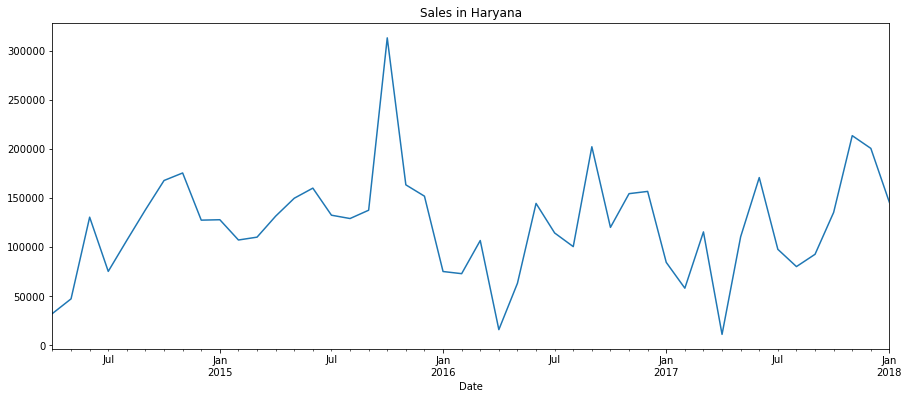

In [46]:
hr.plot(figsize=(15,6))
plt.title("Sales in Haryana")
plt.show()

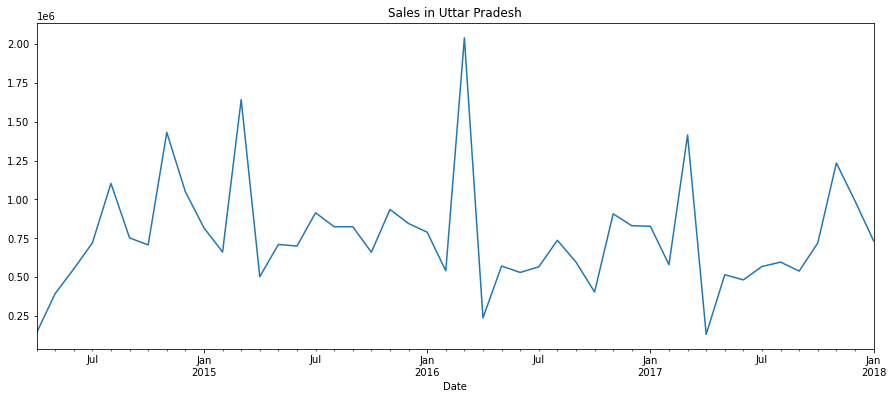

In [47]:
up.plot(figsize=(15,6))
plt.title("Sales in Uttar Pradesh")
plt.show()

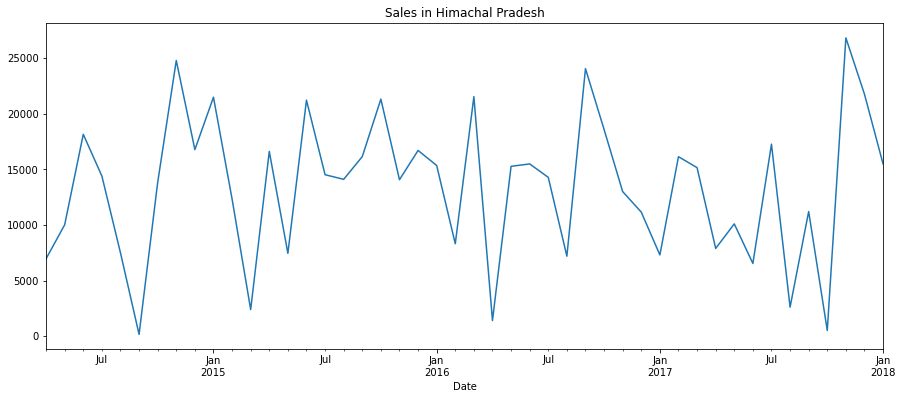

In [48]:
hp.plot(figsize=(15,6))
plt.title("Sales in Himachal Pradesh")
plt.show()

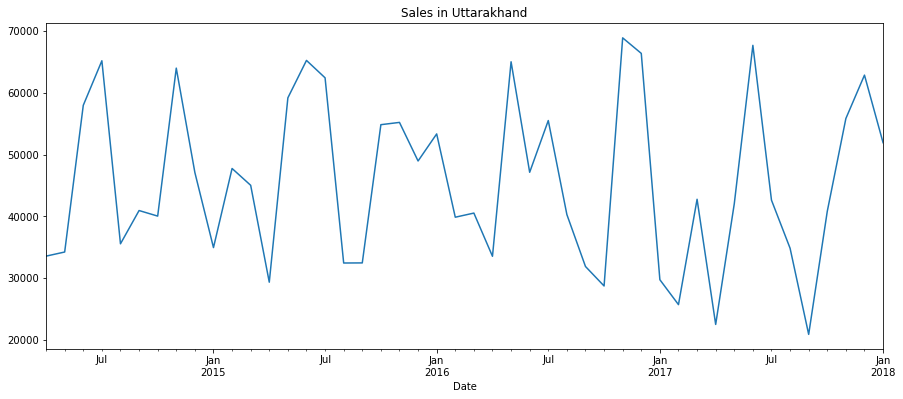

In [49]:
uk.plot(figsize=(15,6))
plt.title("Sales in Uttarakhand")
plt.show()

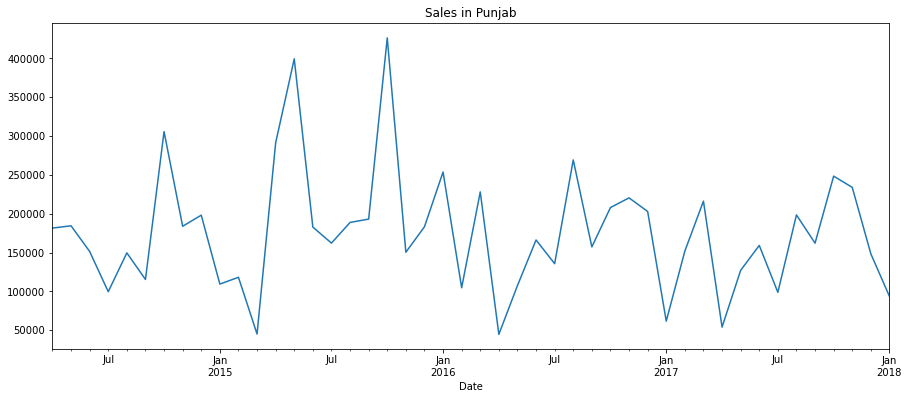

In [50]:
pj.plot(figsize=(15,6))
plt.title("Sales in Punjab")
plt.show()

### Decomposition graph for Haryana

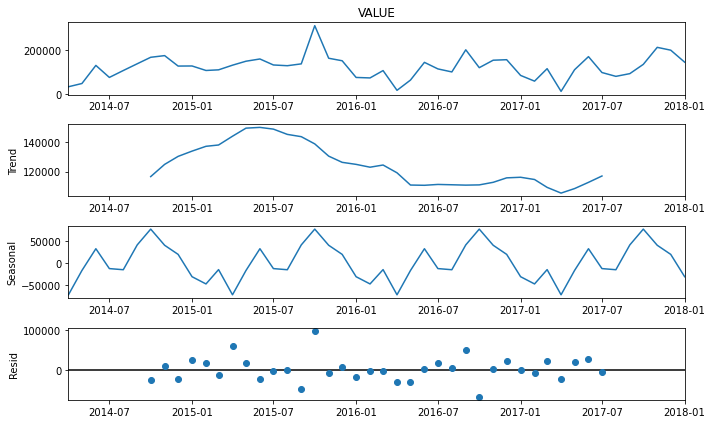

In [51]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(hr) # to understand is the data has trend or seasonality
fig = decomposition.plot()
plt.show()

# we use this to print the graph to get the insights from the graphs and which model to use
# resid is error

### Decomposition graph for Himachal Pradesh

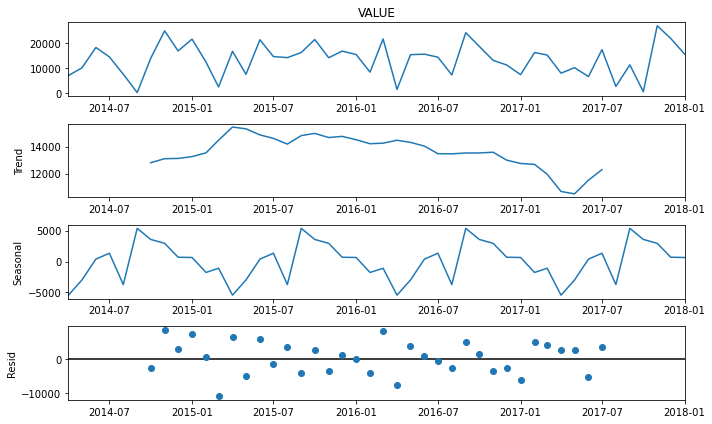

In [52]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(hp) # to understand is the data has trend or seasonality
fig = decomposition.plot()
plt.show()

# we use this to print the graph to get the insights from the graphs and which model to use
# resid is error

### Decomposition graph for Uttar Pradesh

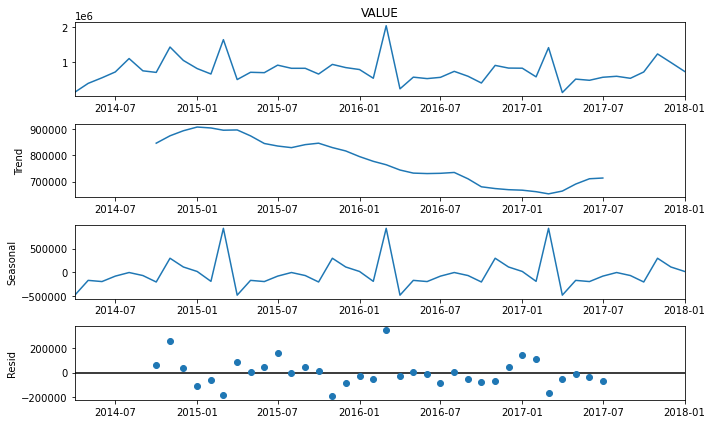

In [53]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(up) # to understand is the data has trend or seasonality
fig = decomposition.plot()
plt.show()

# we use this to print the graph to get the insights from the graphs and which model to use
# resid is error

### Decomposition graph for Uttarakhand

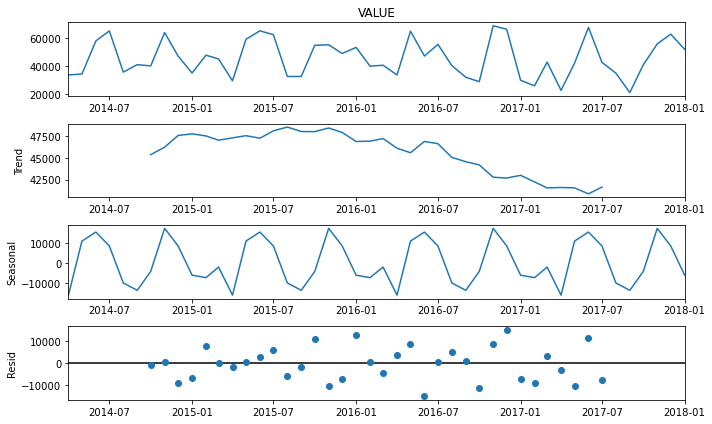

In [54]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(uk) # to understand is the data has trend or seasonality
fig = decomposition.plot()
plt.show()

# we use this to print the graph to get the insights from the graphs and which model to use
# resid is error

### Decomposition graph for Punjab

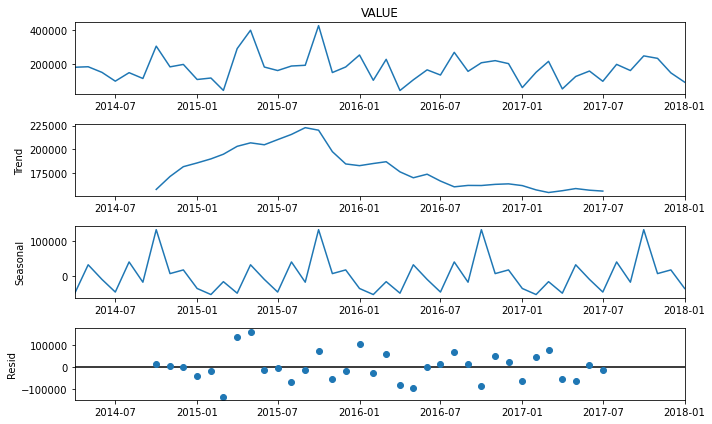

In [55]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(pj) # to understand is the data has trend or seasonality
fig = decomposition.plot()
plt.show()

# we use this to print the graph to get the insights from the graphs and which model to use
# resid is error

### By looking the above plotted decomposition graphs we can conclude that there is a visible seasonality pattern repeating in the data for each state but has no trend as such

# Since there is a seasonal component present in the data we will using Holt Winter's model and SARIMAX as these covers trend as well as seasonality and will comparing the AIC, MAPE, Median APE and RMSE

In [56]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

## Autocorrelation using ACF and PACF

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

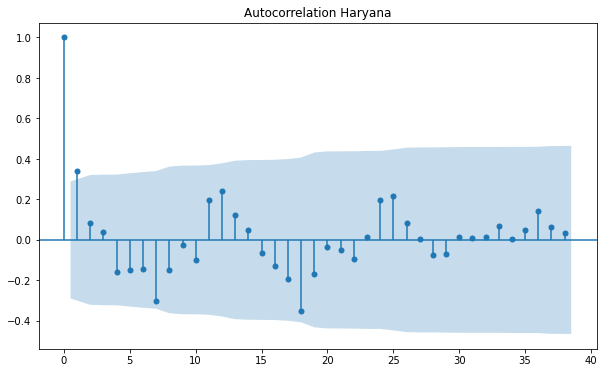

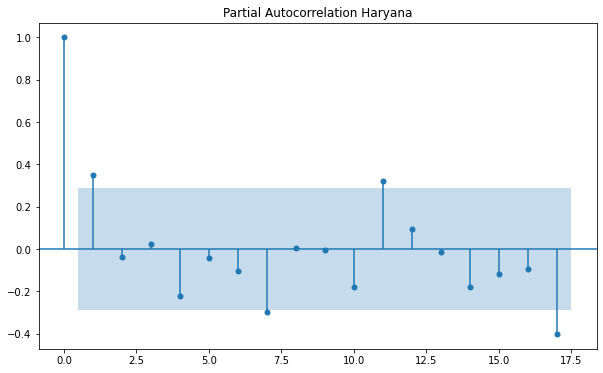

In [58]:
plot_acf(hr, lags = 38)
plt.title('Autocorrelation Haryana')

plot_pacf(hr)
plt.title('Partial Autocorrelation Haryana')


plt.show()

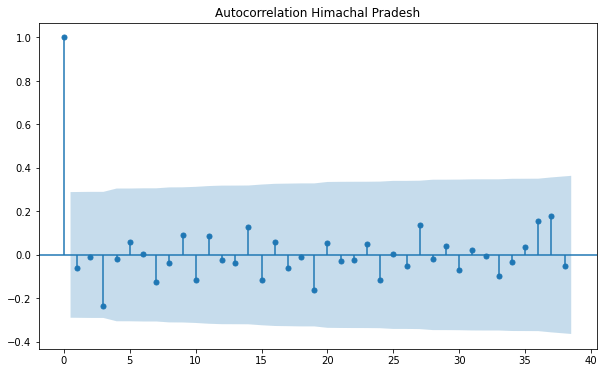

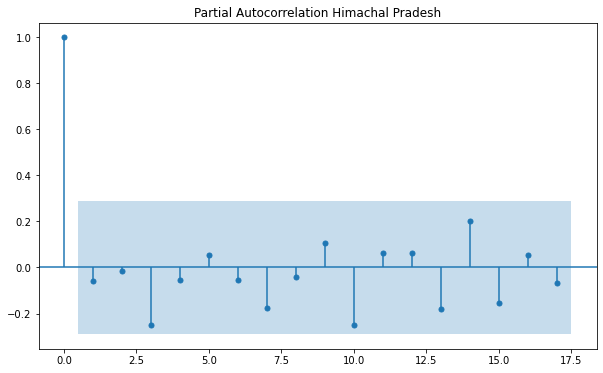

In [59]:
plot_acf(hp, lags = 38)
plt.title('Autocorrelation Himachal Pradesh')


plot_pacf(hp)
plt.title('Partial Autocorrelation Himachal Pradesh')


plt.show()

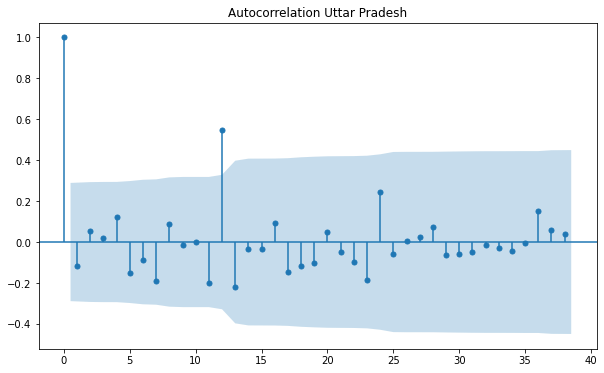

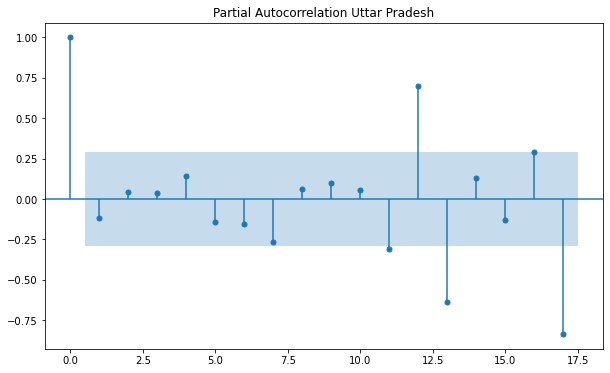

In [60]:
plot_acf(up, lags = 38)
plt.title('Autocorrelation Uttar Pradesh')


plot_pacf(up)
plt.title('Partial Autocorrelation Uttar Pradesh')


plt.show()

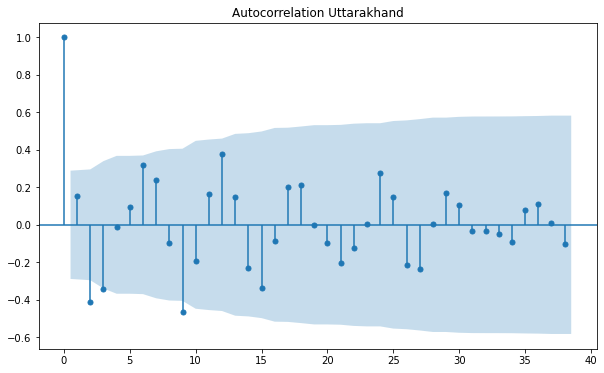

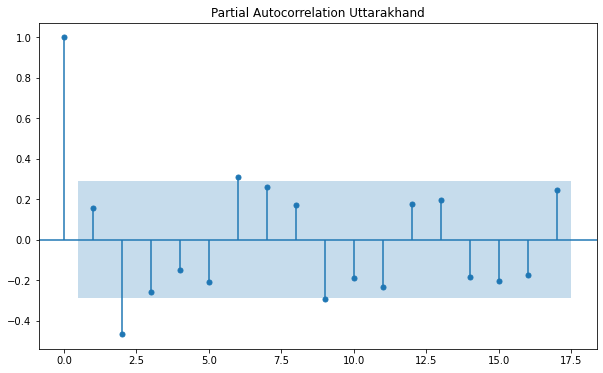

In [61]:
plot_acf(uk, lags = 38)
plt.title('Autocorrelation Uttarakhand')

plot_pacf(uk)
plt.title('Partial Autocorrelation Uttarakhand')


plt.show()

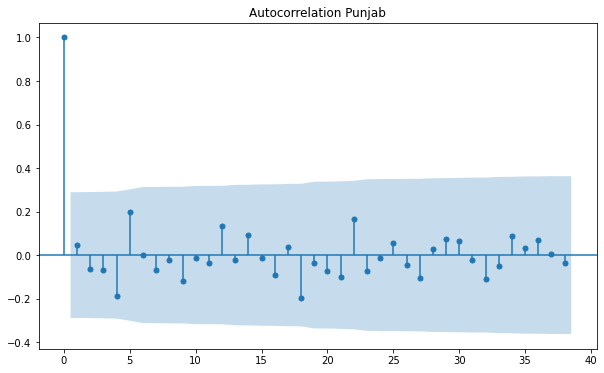

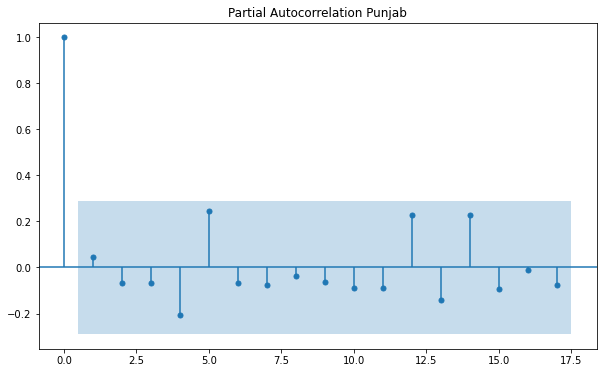

In [62]:
plot_acf(pj, lags = 38)
plt.title('Autocorrelation Punjab')


plot_pacf(pj)
plt.title('Partial Autocorrelation Punjab')


plt.show()

In [63]:
hr_train = hr[:38]
hr_test = hr[38:]

hp_train = hp[:38]
hp_test = hp[38:]

up_train = up[:38]
up_test = up[38:]

uk_train = uk[:38]
uk_test = uk[38:]

pj_train = pj[:38]
pj_test = pj[38:]

In [64]:
print(hr_train.shape)
hr_train

(38,)


Date
2014-04-01     32577.660
2014-05-01     47482.740
2014-06-01    130684.185
2014-07-01     75471.075
2014-08-01    107146.530
2014-09-01    138232.710
2014-10-01    168045.030
2014-11-01    175710.870
2014-12-01    127656.945
2015-01-01    128078.820
2015-02-01    107427.060
2015-03-01    110342.925
2015-04-01    131720.580
2015-05-01    149968.395
2015-06-01    160265.790
2015-07-01    132693.660
2015-08-01    129301.785
2015-09-01    137774.115
2015-10-01    313321.500
2015-11-01    163620.135
2015-12-01    152072.100
2016-01-01     75341.880
2016-02-01     73139.760
2016-03-01    106902.720
2016-04-01     16131.285
2016-05-01     63360.630
2016-06-01    144712.575
2016-07-01    114598.395
2016-08-01    100687.320
2016-09-01    202416.975
2016-10-01    120286.890
2016-11-01    154636.020
2016-12-01    156926.565
2017-01-01     84634.065
2017-02-01     58354.155
2017-03-01    115689.195
2017-04-01     11309.085
2017-05-01    110724.975
Freq: MS, Name: VALUE, dtype: float64

In [65]:
print(hr_test.shape)
hr_test

(8,)


Date
2017-06-01    171017.595
2017-07-01     97934.940
2017-08-01     80357.130
2017-09-01     92884.995
2017-10-01    135560.655
2017-11-01    213711.210
2017-12-01    200733.525
2018-01-01    145582.245
Freq: MS, Name: VALUE, dtype: float64

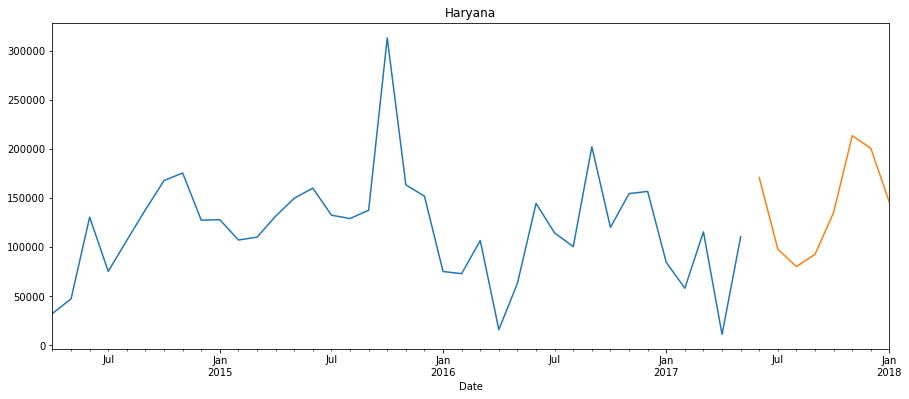

In [66]:
hr_train.plot(figsize=(15,6))
hr_test.plot(figsize=(15,6))
plt.title("Haryana")
plt.show()

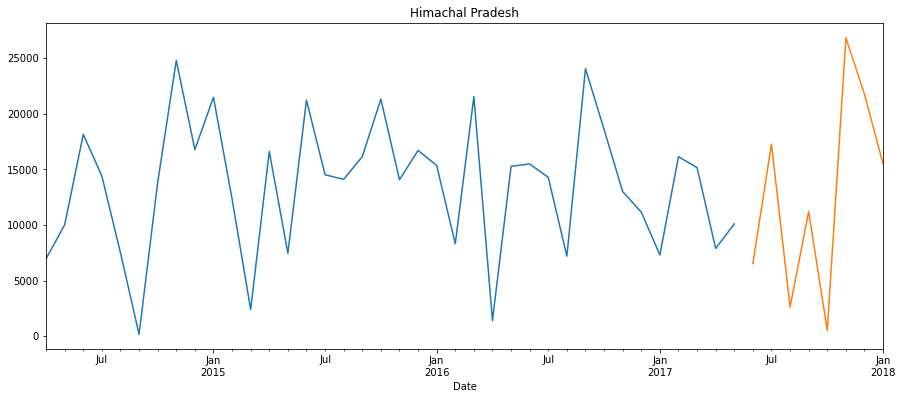

In [67]:
hp_train.plot(figsize=(15,6))
hp_test.plot(figsize=(15,6))
plt.title("Himachal Pradesh")
plt.show()

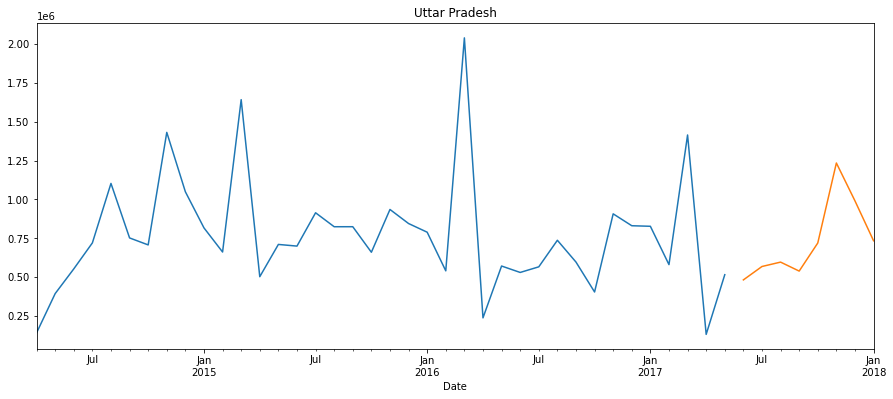

In [68]:
up_train.plot(figsize=(15,6))
up_test.plot(figsize=(15,6))
plt.title("Uttar Pradesh")
plt.show()

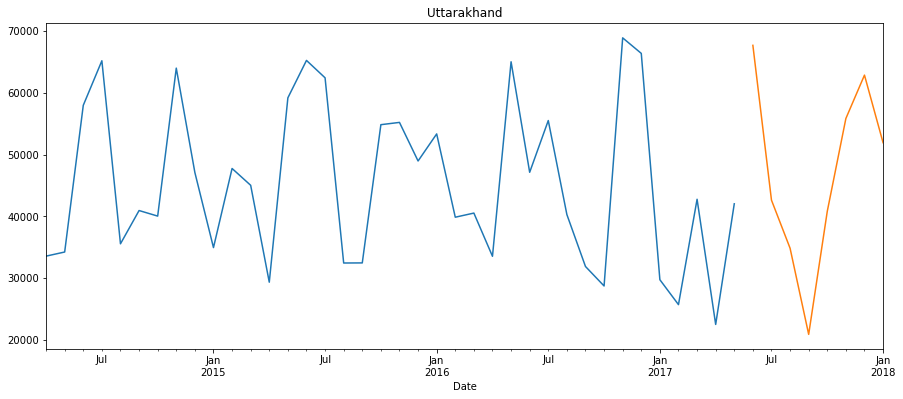

In [69]:
uk_train.plot(figsize=(15,6))
uk_test.plot(figsize=(15,6))
plt.title("Uttarakhand")
plt.show()

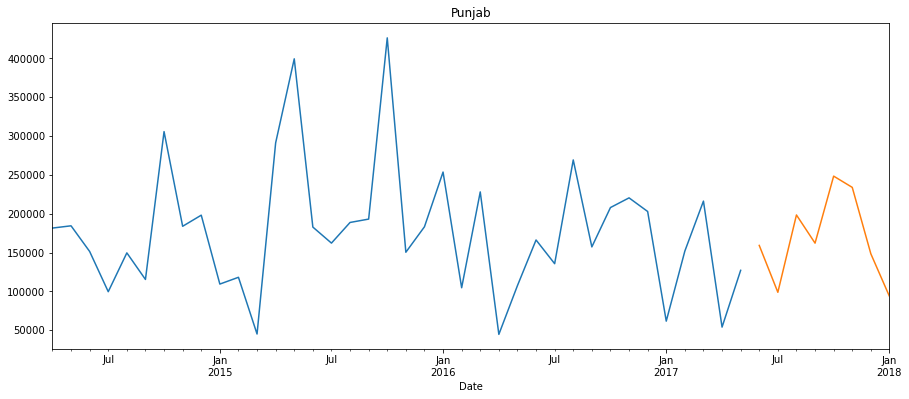

In [70]:
pj_train.plot(figsize=(15,6))
pj_test.plot(figsize=(15,6))
plt.title("Punjab")
plt.show()

## Since we have seasonality component we will be using Holt Winter's model and SARIMAX as these are models which handles the trend and seasonality in the data.

### Implementing Holt Winter's Model also known as third level exponential smoothing

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def check_rmse(test,hw):
    rmse = np.round(sqrt(mean_squared_error(test, hw)),2)
    return print(rmse)


import numpy as np

def check_mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return print(np.mean(np.abs((actual - pred) / actual)) * 100)

def check_median_ape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return print(np.median(np.abs((actual - pred) / actual)) * 100)

### Holt Winter's model on Haryana

C:\Users\Azharuddin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


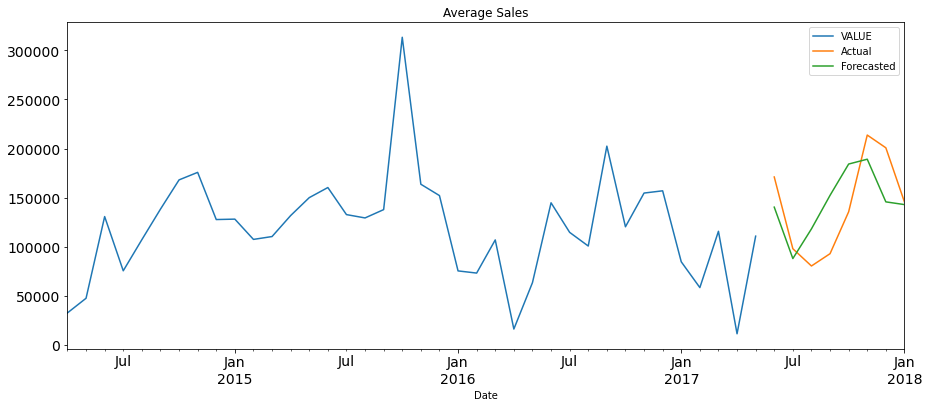

In [72]:
from statsmodels.tsa.api import ExponentialSmoothing

hr_Holt_Winter = hr_test.copy()

#seasonalperiods=gamma
hr_fit = ExponentialSmoothing(hr_train , seasonal_periods=12, trend='add', seasonal='add').fit()
# seasonal_periods=12 most important it means a year 12 months
# add is the type of model add for additive mul for multiplication

hr_Holt_Winter['Holt_Winter'] = hr_fit.forecast(steps=len(hr_test))

hr_train.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
hr_test.plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Actual")
hr_Holt_Winter['Holt_Winter'].plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Forecasted")

plt.legend()
plt.show()


In [73]:
print("HARYANA")
print()

print("AIC")
print(hr_fit.aic.round(2))
print()

print("RMSE")
check_rmse(hr_test, hr_Holt_Winter["Holt_Winter"])
print()

print("MAPE")
check_mape(hr_test, hr_Holt_Winter['Holt_Winter'])
print()

print("Median APE")
check_median_ape(hr_test, hr_Holt_Winter['Holt_Winter'])

HARYANA

AIC
844.44

RMSE
38752.58

MAPE
26.981938244523494

Median APE
22.701309378060518


In [74]:
hr_Holt_Winter["Holt_Winter"]

2017-06-01    140291.124697
2017-07-01     87931.840159
2017-08-01    118147.747924
2017-09-01    152315.797915
2017-10-01    184189.164918
2017-11-01    189118.718197
2017-12-01    145660.734025
2018-01-01    142892.134247
Freq: MS, dtype: float64

### Holt Winter's model on Uttar Pradesh

C:\Users\Azharuddin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


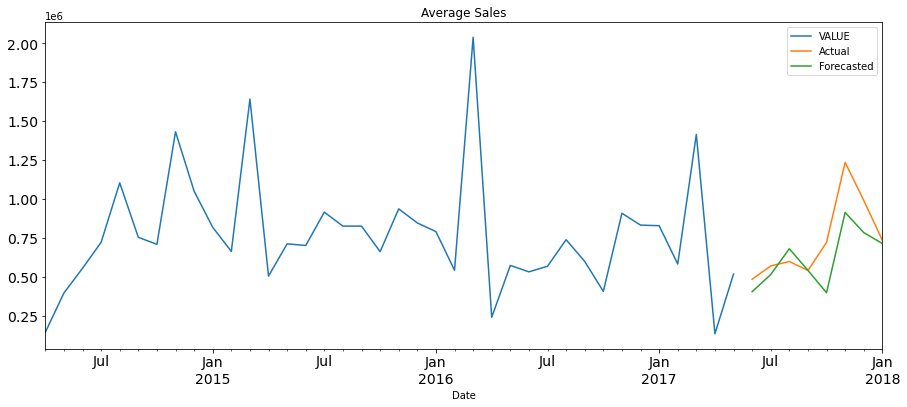

In [75]:
from statsmodels.tsa.api import ExponentialSmoothing

up_Holt_Winter = up_test.copy()

#seasonalperiods=gamma
up_fit = ExponentialSmoothing(up_train , seasonal_periods=12, trend='add', seasonal='add').fit()
# seasonal_periods=12 most important it means a year 12 months
# add is the type of model add for additive mul for multiplication

up_Holt_Winter['Holt_Winter'] = up_fit.forecast(steps=len(up_test))

up_train.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
up_test.plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Actual")
up_Holt_Winter['Holt_Winter'].plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Forecasted")

plt.legend()
plt.show()


In [76]:
up_Holt_Winter["Holt_Winter"]

2017-06-01    403128.406326
2017-07-01    513777.697625
2017-08-01    679522.188303
2017-09-01    540611.401883
2017-10-01    396694.551450
2017-11-01    912861.448401
2017-12-01    783532.573455
2018-01-01    713266.141856
Freq: MS, dtype: float64

In [77]:
print("UTTAR PRADESH")
print()

print("AIC")
print(up_fit.aic.round(2))
print()

print("RMSE")
check_rmse(up_test, up_Holt_Winter["Holt_Winter"])
print()

print("MAPE")
check_mape(up_test, up_Holt_Winter['Holt_Winter'])
print()

print("Median APE")
check_median_ape(up_test, up_Holt_Winter['Holt_Winter'])

UTTAR PRADESH

AIC
951.55

RMSE
183024.69

MAPE
16.878130195076075

Median APE
15.142908827529439


### Holt Winter's model on Uttarakhand

C:\Users\Azharuddin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


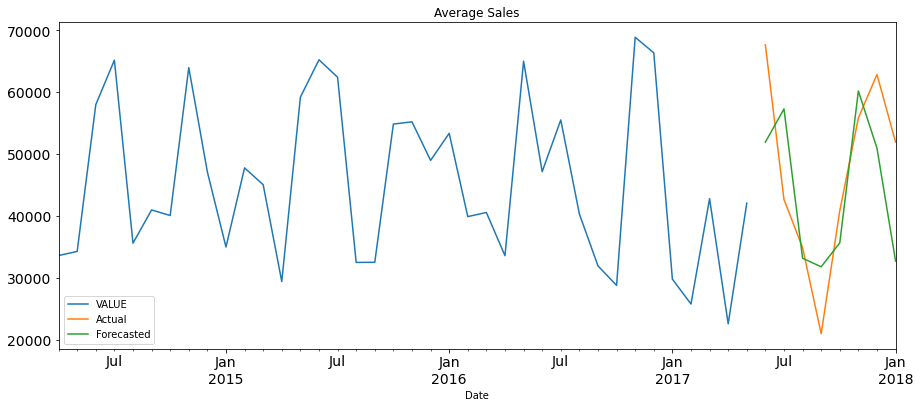

In [78]:
from statsmodels.tsa.api import ExponentialSmoothing

uk_Holt_Winter = uk_test.copy()

#seasonalperiods=gamma
uk_fit = ExponentialSmoothing(uk_train , seasonal_periods=12, trend='add', seasonal='add').fit()
# seasonal_periods=12 most important it means a year 12 months
# add is the type of model add for additive mul for multiplication

uk_Holt_Winter['Holt_Winter'] = uk_fit.forecast(steps=len(uk_test))

uk_train.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
uk_test.plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Actual")
uk_Holt_Winter['Holt_Winter'].plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Forecasted")

plt.legend()
plt.show()


In [79]:
uk_Holt_Winter["Holt_Winter"]

2017-06-01    51922.212969
2017-07-01    57289.336426
2017-08-01    33145.264145
2017-09-01    31760.772427
2017-10-01    35628.801748
2017-11-01    60183.611877
2017-12-01    50938.777157
2018-01-01    32685.966771
Freq: MS, dtype: float64

In [80]:
print("UTTARAKHAND")
print()

print("AIC")
print(uk_fit.aic.round(2))
print()

print("RMSE")
check_rmse(uk_test, uk_Holt_Winter["Holt_Winter"])
print()

print("MAPE")
check_mape(uk_test, uk_Holt_Winter['Holt_Winter'])
print()

print("Median APE")
check_median_ape(uk_test, uk_Holt_Winter['Holt_Winter'])

UTTARAKHAND

AIC
732.86

RMSE
11941.76

MAPE
23.854408801064338

Median APE
21.11254305465426


### Holt Winter's model on Himachal Pradesh

C:\Users\Azharuddin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


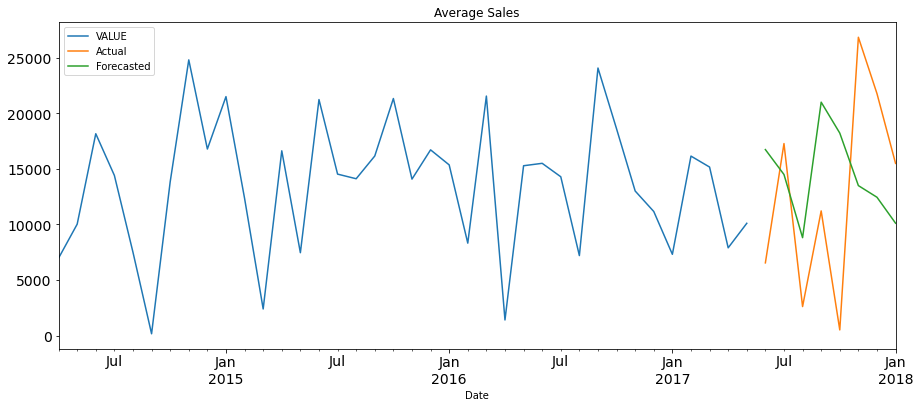

In [81]:
from statsmodels.tsa.api import ExponentialSmoothing

hp_Holt_Winter = hp_test.copy()

#seasonalperiods=gamma
hp_fit = ExponentialSmoothing(hp_train , seasonal_periods=12, trend='add', seasonal='add').fit()
# seasonal_periods=12 most important it means a year 12 months
# add is the type of model add for additive mul for multiplication

hp_Holt_Winter['Holt_Winter'] = hp_fit.forecast(steps=len(hp_test))

hp_train.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
hp_test.plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Actual")
hp_Holt_Winter['Holt_Winter'].plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Forecasted")

plt.legend()
plt.show()


In [82]:
hp_Holt_Winter["Holt_Winter"]

2017-06-01    16733.651353
2017-07-01    14491.376883
2017-08-01     8809.649219
2017-09-01    20998.724837
2017-10-01    18217.730368
2017-11-01    13493.867930
2017-12-01    12445.372951
2018-01-01    10110.385479
Freq: MS, dtype: float64

In [83]:
print("HIMACHAL PRADESH")
print()

print("AIC")
print(hp_fit.aic.round(2))
print()

print("RMSE")
check_rmse(hp_test, hp_Holt_Winter["Holt_Winter"])
print()

print("MAPE")
check_mape(hp_test, hp_Holt_Winter['Holt_Winter'])
print()

print("Median APE")
check_median_ape(hp_test, hp_Holt_Winter['Holt_Winter'])

HIMACHAL PRADESH

AIC
702.48

RMSE
10326.17

MAPE
509.68042362505076

Median APE
68.46561488399568


so MAPE >100% means that the errors are "much greater" then the actual values (e.g. actual is 1, you predict 3, so MAPE is 200%). 

### Holt Winter's model on Punjab

C:\Users\Azharuddin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


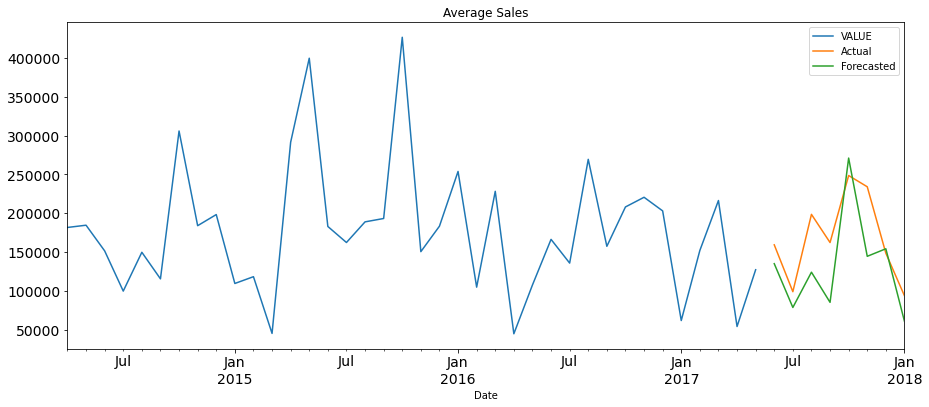

In [84]:
from statsmodels.tsa.api import ExponentialSmoothing

pj_Holt_Winter = pj_test.copy()

#seasonalperiods=gamma
pj_fit = ExponentialSmoothing(pj_train , seasonal_periods=12, trend='add', seasonal='add').fit()
# seasonal_periods=12 most important it means a year 12 months
# add is the type of model add for additive mul for multiplication

pj_Holt_Winter['Holt_Winter'] = pj_fit.forecast(steps=len(pj_test))

pj_train.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
pj_test.plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Actual")
pj_Holt_Winter['Holt_Winter'].plot(figsize=(15,6), title= 'Average Sales', fontsize=14, label = "Forecasted")

plt.legend()
plt.show()


In [85]:
pj_Holt_Winter["Holt_Winter"]

2017-06-01    135012.263164
2017-07-01     78657.738615
2017-08-01    124043.277635
2017-09-01     85243.613272
2017-10-01    270942.797377
2017-11-01    144487.264647
2017-12-01    154201.839377
2018-01-01     60926.744287
Freq: MS, dtype: float64

In [86]:
print("PUNJAB")
print()

print("AIC")
print(pj_fit.aic.round(2))
print()

print("RMSE")
check_rmse(pj_test, pj_Holt_Winter["Holt_Winter"])
print()

print("MAPE")
check_mape(pj_test, pj_Holt_Winter['Holt_Winter'])
print()

print("Median APE")
check_median_ape(pj_test, pj_Holt_Winter['Holt_Winter'])

PUNJAB

AIC
892.38

RMSE
52555.12

MAPE
25.8592881638517

Median APE
27.75615706424981


## Evaluation Matrix for Holt Winter Model

Haryana
    
    - AIC  844.44
    - RMSE 38752.58
    - MAPE 26.98 %
    - Median APE 22.70 %
    
Uttar Pradesh 

    - AIC  951.55
    - RSME 183024.69
    - MAPE 16.87 %
    - Median APE 15.14 % 
    
Uttarakhand

    - AIC  732.85
    - RMSE 11941.76
    - MAPE 23.85 %
    - Median APE 21.11 %
    
Himachal Pradesh

    - AIC  702.48
    - RMSE 10326.17
    - MAPE 509.68 %
    - Median APE 68.46 %
    
Punjab

    - AIC  892.38
    - RMSE 52555.12
    - MAPE 25.85 %
    - Median APE 27.75 %

## Implementing ARIMA using library pmdARIMA

In [87]:
# def auto_arima(y):

#     model = pm.auto_arima(y,start_p=0, max_p=3, d=0, max_d=3,start_q=0, max_q=3,  
#                       start_P=0,max_P=3, D=0, max_D=3, start_Q=0, max_Q=3,
#                       max_order=30, m=12, seasonal=True, information_criterion='aic',
#                       test='adf',trace=True,random_state=10)


In [88]:
import pmdarima as pm

def auto_arima(train):
    arima_model = pm.auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, 
                             start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, 
                         seasonal=True, error_action='warn', trace = True, 
                         supress_warnings=True, stepwise = True, random_state=10,n_fits = 50 )

In [89]:
print("HARYANA")
print()

hr_arima_model = auto_arima(hr_train) 

HARYANA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=644.814, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=629.241, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=627.784, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=631.577, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=629.277, Time=0.09 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=629.224, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=627.807, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=631.215, Time=0.14 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=637.002, Time=0.03 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=628.632, Time=0.06 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=627.929, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=629.332, Time=0.04 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=629.930, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=629.641, Time=0.07 sec

Best model:  ARIMA(0,1,

In [90]:
hr_arima_model = ARIMA(hr, order=(0,1,1))
hr_arima_results = hr_arima_model.fit()

<IPython.core.display.Javascript object>

In [91]:
hr_arima_pred= hr_test.copy()
hr_arima_pred['arima forecast'] = hr_arima_results.predict(36)

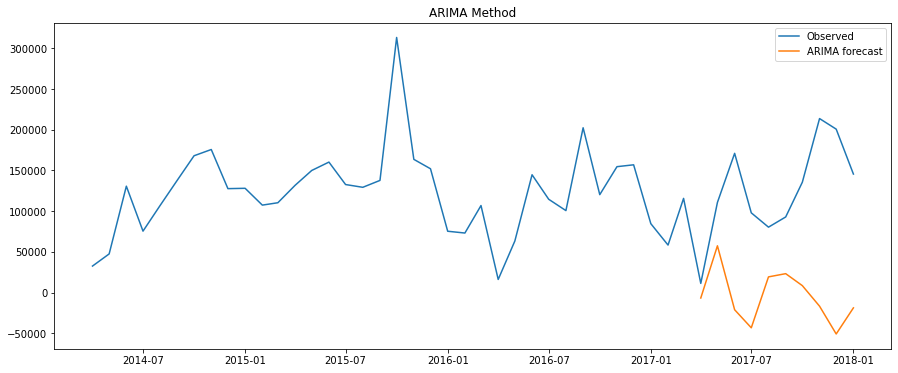

In [92]:
plt.figure(figsize=(15,6))
plt.plot(hr, label='Observed')
plt.plot(hr_arima_pred['arima forecast'], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [93]:
print("AIC")
hr_aic = np.round(hr_arima_results.aic,2)
print(hr_aic)

AIC
1116.05


In [94]:
print("Uttar Pradesh")
print()

up_arima_model = auto_arima(up_train) 

Uttar Pradesh

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=706.922, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=704.107, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=702.959, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=702.678, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=703.575, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=704.724, Time=0.04 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=704.426, Time=0.02 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=703.090, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=706.937, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=703.708, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.481 seconds


In [95]:
up_arima_model = ARIMA(up, order=(0,1,1))
up_arima_results = up_arima_model.fit()

up_arima_pred= up_test.copy()
up_arima_pred['arima forecast'] = up_arima_results.predict(36)

<IPython.core.display.Javascript object>

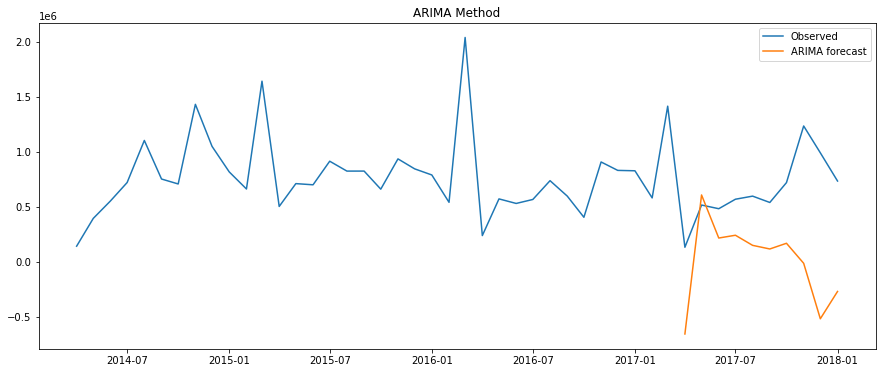

In [96]:
plt.figure(figsize=(15,6))
plt.plot(up, label='Observed')
plt.plot(up_arima_pred['arima forecast'], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [97]:
print("AIC")
up_aic = np.round(up_arima_results.aic,2)
print(up_aic)

AIC
1288.63


In [98]:
print("Himachal Pradesh")
print()

hp_arima_model = auto_arima(hp_train) 

Himachal Pradesh

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=548.395, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=530.433, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=532.766, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=529.944, Time=0.14 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=531.936, Time=0.28 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=531.936, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=530.662, Time=0.11 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=533.937, Time=0.28 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=538.222, Time=0.23 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=529.761, Time=0.13 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=530.801, Time=0.06 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=531.755, Time=0.28 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=531.755, Time=0.27 sec
 ARIMA(2,1,0)(1,1,1

In [99]:
hp_arima_model = ARIMA(hp, order=(0,1,2))
hp_arima_results = hp_arima_model.fit()

<IPython.core.display.Javascript object>

In [100]:
hp_arima_pred= hp_test.copy()
hp_arima_pred['arima forecast'] = hp_arima_results.predict(36)

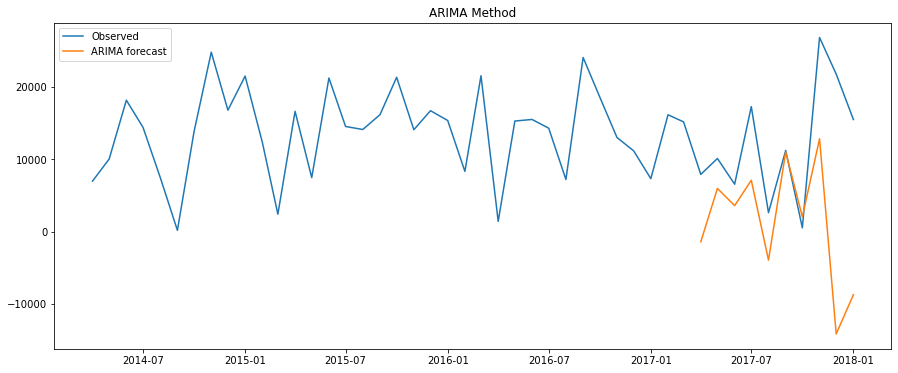

In [101]:
plt.figure(figsize=(15,6))
plt.plot(hp, label='Observed')
plt.plot(hp_arima_pred['arima forecast'], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [102]:
print("AIC")
hp_aic = np.round(hp_arima_results.aic,2)
print(hp_aic)

AIC
930.37


In [103]:
print("UTTARAKHAND")
print()

uk_arima_model = auto_arima(uk_train) 

UTTARAKHAND

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=566.098, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=559.699, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=554.417, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=556.662, Time=0.01 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=556.292, Time=0.07 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=556.326, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=554.433, Time=0.03 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=558.174, Time=0.30 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=562.039, Time=0.03 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=556.344, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=556.102, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=559.560, Time=0.05 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=559.086, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=552.721, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)

In [104]:
uk_arima_model = ARIMA(uk, order=(0,1,1))
uk_arima_results = uk_arima_model.fit()

<IPython.core.display.Javascript object>

In [105]:
uk_arima_pred= uk_test.copy()
uk_arima_pred['arima forecast'] = uk_arima_results.predict(36)

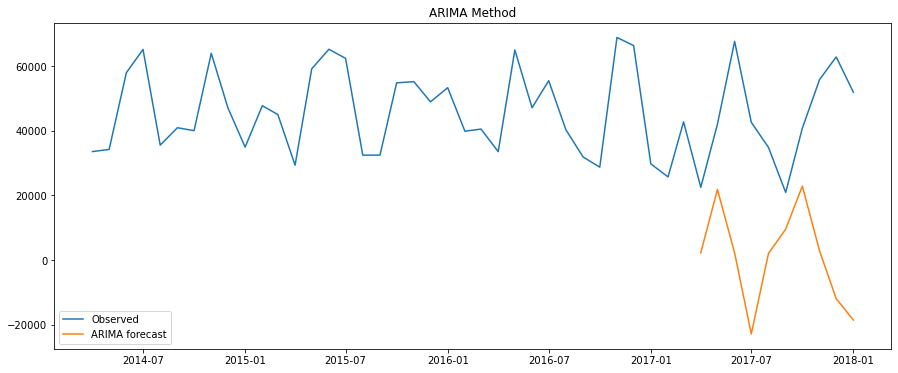

In [106]:
plt.figure(figsize=(15,6))
plt.plot(uk, label='Observed')
plt.plot(uk_arima_pred['arima forecast'], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [107]:
print("AIC")
uk_aic = np.round(uk_arima_results.aic,2)
print(uk_aic)

AIC
993.16


In [108]:
print("Punjab")
print()

pj_arima_model = auto_arima(pj_train) 

Punjab

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=675.951, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=669.246, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=662.049, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=663.676, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=664.034, Time=0.07 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=664.021, Time=0.09 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=663.661, Time=0.03 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=665.806, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=668.067, Time=0.03 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=664.005, Time=0.06 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=666.349, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=666.382, Time=0.03 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=665.140, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=662.040, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12] 

In [109]:
pj_arima_model = ARIMA(pj, order=(0,1,1))
pj_arima_results = pj_arima_model.fit()

<IPython.core.display.Javascript object>

In [110]:
pj_arima_pred= pj_test.copy()
pj_arima_pred['arima forecast'] = pj_arima_results.predict(36)

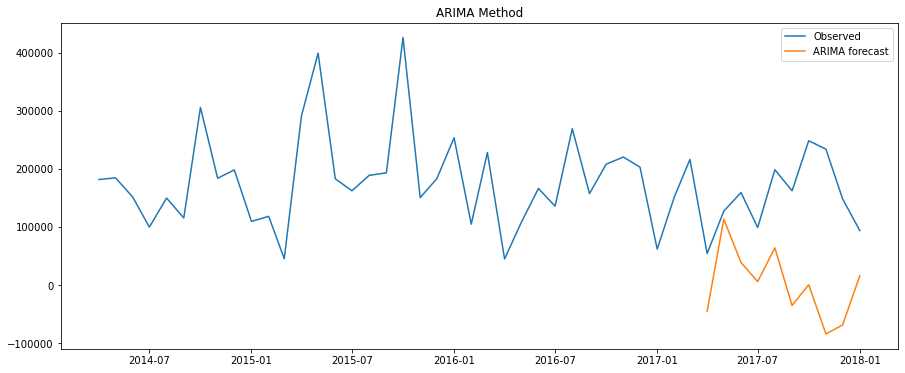

In [111]:
plt.figure(figsize=(15,6))
plt.plot(pj, label='Observed')
plt.plot(pj_arima_pred['arima forecast'], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [112]:
print("AIC")
pj_aic = np.round(pj_arima_results.aic,2)
print(pj_aic)

AIC
1152.91


Comparing AIC RMSE MAPE and Median APE of Holt Winter's model and ARIMA model for Haryana

*Haryana  Holt Winter's* -------------------------------------------- *Haryana ARIMA*
    
    - AIC  844.44                           - AIC  1116.05
    

*Uttar Pradesh  Holt Winter's* -------------------------------------------- *Uttar Pradesh ARIMA*

    - AIC  951.55                           - AIC  1288.63
    

By comparing the AIC scores for the ARIMA model and Holt Winter's modelwe observe that Holt Winter's model has a lesser AIC score which makes it more preferable model.

This is because ARIMA models can handle trend but is unable to handle seasonality.

Whereas Holt Winter's model can handle both trend and seasonality so we can continue with the SARIMAX model as it can handle trend and seasonality component in the data.


# Validating SARIMAX models 

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   38
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -310.892
Date:                            Wed, 23 Mar 2022   AIC                            627.784
Time:                                    22:25:02   BIC                            631.441
Sample:                                04-01-2014   HQIC                           628.798
                                     - 05-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6480      0.256     -2.527      0.012      -1.151      -0.145
ma.S.L12      -0.5815      0.350   

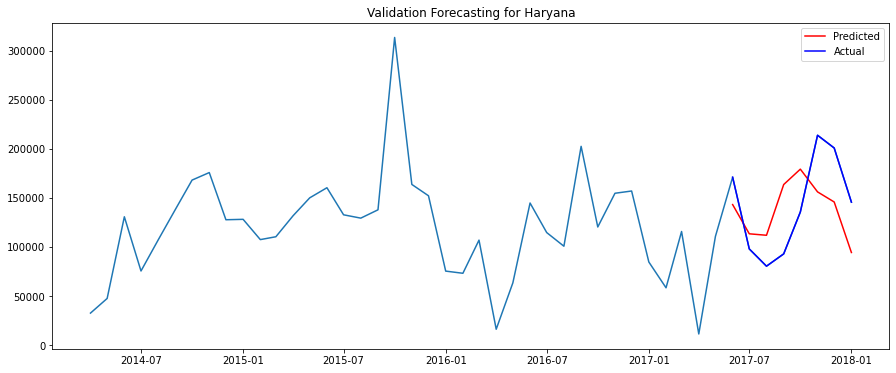

In [183]:
import statsmodels.api as sm

hr_sarima_model = sm.tsa.SARIMAX(hr_train, order = (0,1,1), seasonal_order = (0,1,1,12))
hr_sarima_results = hr_sarima_model.fit()

print(hr_sarima_results.summary())

hr_sar_pred = hr_sarima_results.predict(start = 38, end = 45, dynamic = True)

rcParams['figure.figsize'] = 15,6
plt.plot(hr)
plt.plot(hr_sar_pred, color = "red", label="Predicted")
plt.plot(hr_test, color = "blue", label = "Actual")

plt.title("Validation Forecasting for Haryana")
plt.legend()
plt.show()

In [114]:
check_rmse(hr_test, hr_sar_pred)

47279.55


In [115]:
check_mape(hr_test, hr_sar_pred)

33.63472375957458


In [116]:
check_median_ape(hr_test, hr_sar_pred)

29.791275053278767


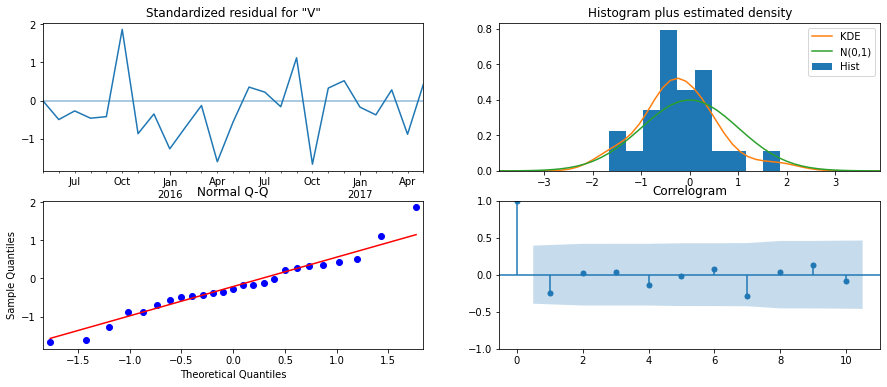

In [117]:
hr_sarima_results.plot_diagnostics(figsize=(15,6))
plt.show()

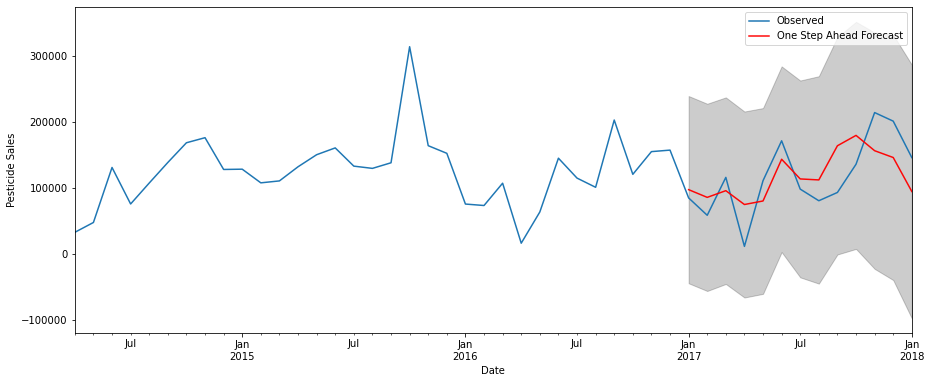

In [118]:
hr_sales_pred = hr_sarima_results.get_prediction(start=pd.to_datetime('2017-01-01'), end = pd.to_datetime('2018-01-01'), dynamic=False)
hr_sales_pred_ci = hr_sales_pred.conf_int()
hr_ax = hr['2014':].plot(label='Observed')
hr_sales_pred.predicted_mean.plot(ax=hr_ax, color="red", label='One Step Ahead Forecast', alpha=10, figsize=(15, 6))
hr_ax.fill_between(hr_sales_pred_ci.index,
                hr_sales_pred_ci.iloc[:, 0],
                hr_sales_pred_ci.iloc[:, 1], color='k', alpha=.20)
hr_ax.set_xlabel('Date')
hr_ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

### 8 Months Forecast

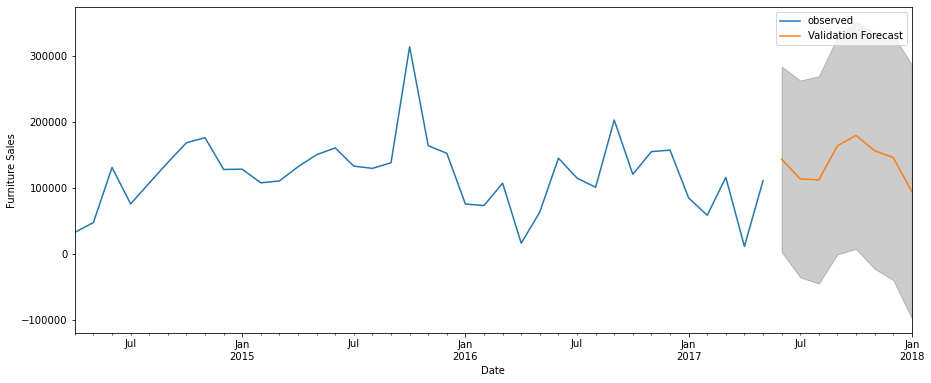

In [119]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
hr_pred = hr_sarima_results.get_forecast(steps=8)
hr_pred_ci2 = hr_pred.conf_int()

plt.figure(figsize=(15,6))
hr_ax = hr_train['2014':].plot(label="observed")
hr_pred.predicted_mean.plot(ax=hr_ax, label="Validation Forecast")

hr_ax.fill_between(hr_pred_ci2.index, hr_pred_ci2.iloc[:, 0], hr_pred_ci2.iloc[:, 1], color='k', alpha=.20)

hr_ax.set_xlabel("Date")
hr_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [120]:
hr_pred.predicted_mean

2017-06-01    143113.289396
2017-07-01    113333.491840
2017-08-01    111847.366180
2017-09-01    163516.518874
2017-10-01    179190.902127
2017-11-01    156029.339499
2017-12-01    145737.531413
2018-01-01     94286.295235
Freq: MS, Name: predicted_mean, dtype: float64

In [121]:
check_rmse(hr_test, hr_pred.predicted_mean)

47279.55


In [122]:
check_mape(hr_test, hr_pred.predicted_mean)

33.63472375957458


In [123]:
check_median_ape(hr_test, hr_pred.predicted_mean)

29.791275053278767


                                      SARIMAX Results                                      
Dep. Variable:                               VALUE   No. Observations:                   38
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -349.339
Date:                             Wed, 23 Mar 2022   AIC                            702.678
Time:                                     21:32:23   BIC                            705.116
Sample:                                 04-01-2014   HQIC                           703.354
                                      - 05-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3431      0.137     -2.507      0.012      -0.611      -0.075
sigma2      6.754e+10   3.1

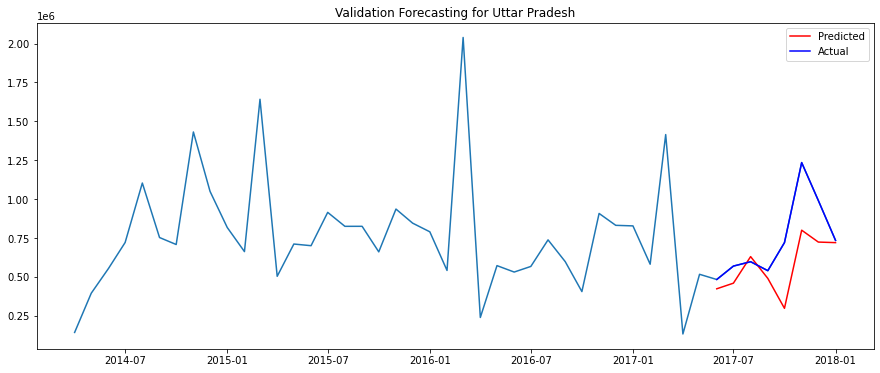

In [124]:
import statsmodels.api as sm

up_sarima_model = sm.tsa.SARIMAX(up_train, order = (0,1,1), seasonal_order = (0,1,0,12))
up_sarima_results = up_sarima_model.fit()

print(up_sarima_results.summary())

up_sar_pred = up_sarima_results.predict(start = 38, end = 45, dynamic = True)

rcParams['figure.figsize'] = 15,6
plt.plot(up)
plt.plot(up_sar_pred, color = "red", label="Predicted")
plt.plot(up_test, color = "blue", label = "Actual")

plt.title("Validation Forecasting for Uttar Pradesh")
plt.legend()
plt.show()

In [125]:
check_rmse(up_test, up_sar_pred)

239313.59


In [126]:
check_mape(up_test, up_sar_pred)

21.140202865060928


In [127]:
check_median_ape(up_test, up_sar_pred)

15.823721857249575


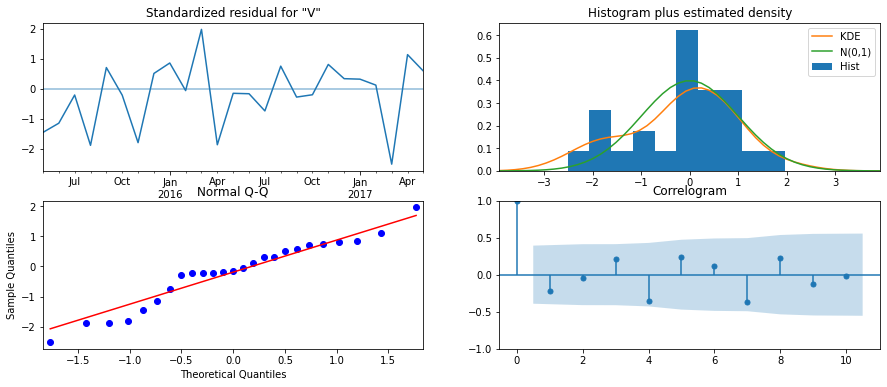

In [128]:
up_sarima_results.plot_diagnostics(figsize=(15,6))
plt.show()

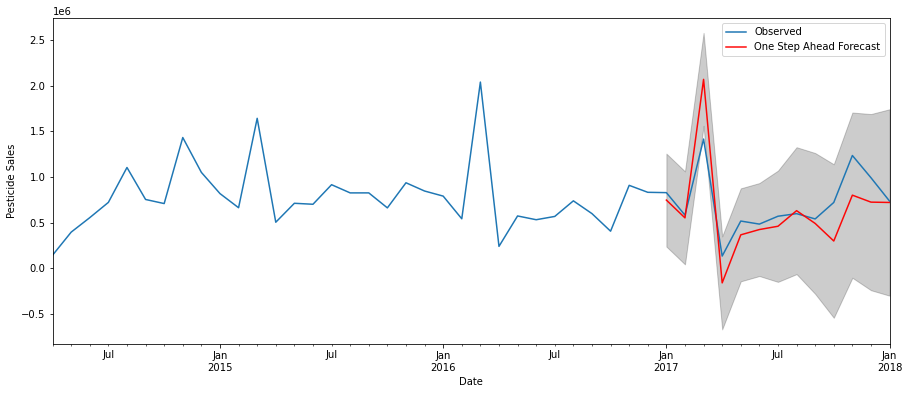

In [129]:
up_sales_pred = up_sarima_results.get_prediction(start=pd.to_datetime('2017-01-01'), end = pd.to_datetime('2018-01-01'), dynamic=False)
up_sales_pred_ci = up_sales_pred.conf_int()

up_ax = up['2014':].plot(label='Observed')
up_sales_pred.predicted_mean.plot(ax=up_ax, color="red", label='One Step Ahead Forecast', alpha=10, figsize=(15, 6))

up_ax.fill_between(up_sales_pred_ci.index,
                up_sales_pred_ci.iloc[:, 0],
                up_sales_pred_ci.iloc[:, 1], color='k', alpha=.20)

up_ax.set_xlabel('Date')
up_ax.set_ylabel('Pesticide Sales')

plt.legend()
plt.show()

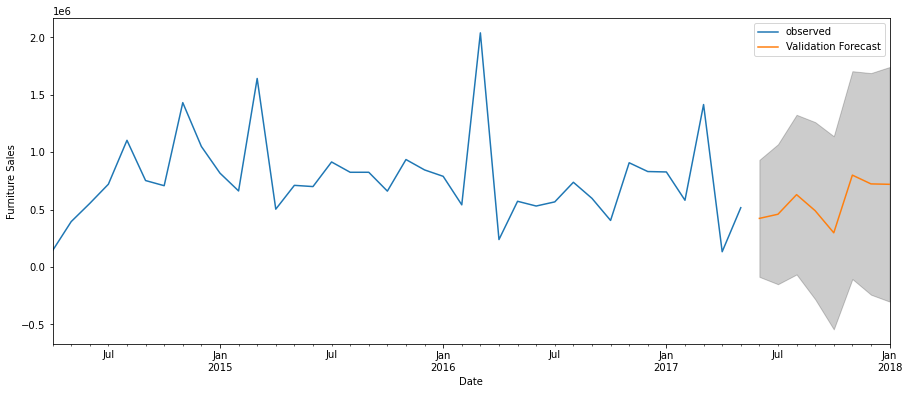

In [130]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
up_pred = up_sarima_results.get_forecast(steps=8)
up_pred_ci2 = up_pred.conf_int()

plt.figure(figsize=(15,6))
up_ax = up_train['2014':].plot(label="observed")
up_pred.predicted_mean.plot(ax=up_ax, label="Validation Forecast")

up_ax.fill_between(up_pred_ci2.index,
                up_pred_ci2.iloc[:, 0],
                up_pred_ci2.iloc[:, 1], color='k', alpha=.20)

up_ax.set_xlabel("Date")
up_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [131]:
up_pred.predicted_mean

2017-06-01    423370.353412
2017-07-01    459484.473412
2017-08-01    630224.103412
2017-09-01    490184.013412
2017-10-01    297766.488412
2017-11-01    800123.493412
2017-12-01    723707.445412
2018-01-01    720128.433412
Freq: MS, Name: predicted_mean, dtype: float64

In [132]:
check_rmse(up_test, up_pred.predicted_mean)

239313.59


In [133]:
check_mape(up_test, up_pred.predicted_mean)

21.140202865060928


In [134]:
check_median_ape(up_test, up_pred.predicted_mean)

15.823721857249575


                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   38
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -274.208
Date:                            Wed, 23 Mar 2022   AIC                            554.417
Time:                                    21:32:26   BIC                            558.073
Sample:                                04-01-2014   HQIC                           555.431
                                     - 05-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5922      0.216     -2.736      0.006      -1.017      -0.168
ma.S.L12      -0.4318      0.417   

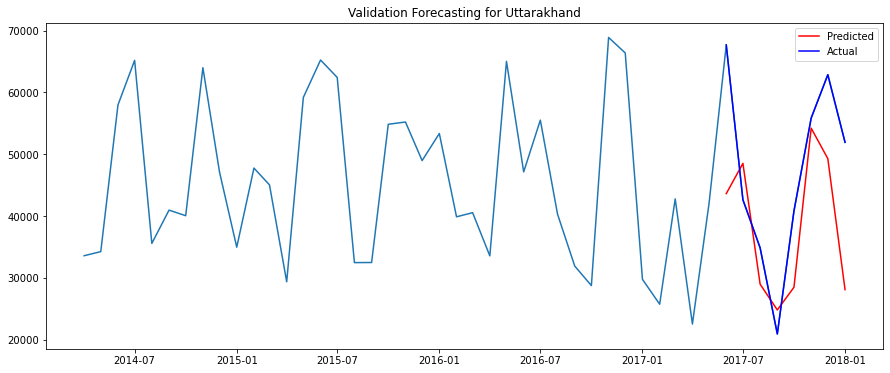

In [135]:
import statsmodels.api as sm

uk_sarima_model = sm.tsa.SARIMAX(uk_train, order = (0,1,1), seasonal_order = (0,1,1,12))
uk_sarima_results = uk_sarima_model.fit()

print(uk_sarima_results.summary())

uk_sar_pred = uk_sarima_results.predict(start = 38, end = 45, dynamic = True)

rcParams['figure.figsize'] = 15,6
plt.plot(uk)
plt.plot(uk_sar_pred, color = "red", label="Predicted")
plt.plot(uk_test, color = "blue", label = "Actual")

plt.title("Validation Forecasting for Uttarakhand")
plt.legend()
plt.show()

In [136]:
check_rmse(uk_test, uk_sar_pred)

14004.02


In [137]:
check_mape(uk_test, uk_sar_pred)

23.16949671669224


In [138]:
check_median_ape(uk_test, uk_sar_pred)

20.07422586983878


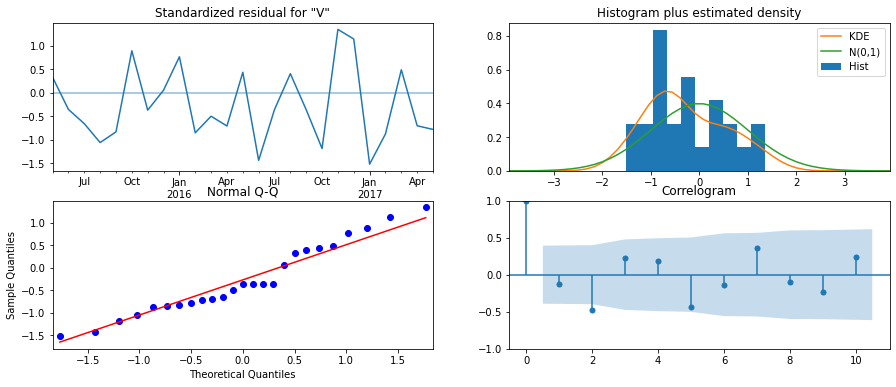

In [139]:
uk_sarima_results.plot_diagnostics(figsize=(15,6))
plt.show()

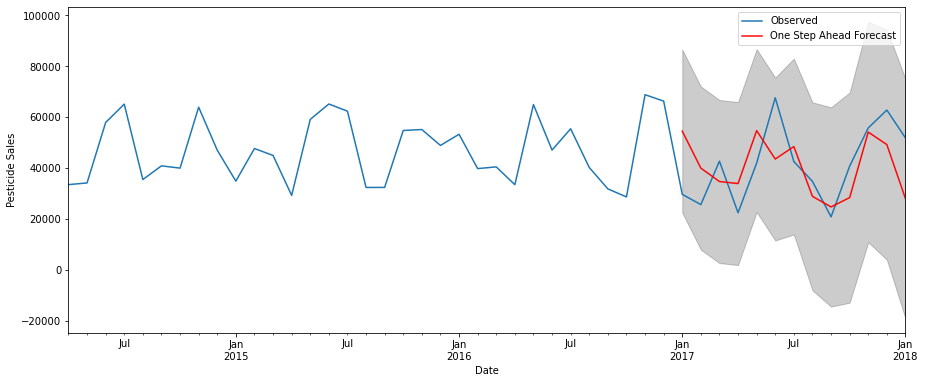

In [140]:
uk_sales_pred = uk_sarima_results.get_prediction(start=pd.to_datetime('2017-01-01'), end = pd.to_datetime('2018-01-01'), dynamic=False)
uk_sales_pred_ci = uk_sales_pred.conf_int()
uk_ax = uk['2014':].plot(label='Observed')
uk_sales_pred.predicted_mean.plot(ax=uk_ax, color="red", label='One Step Ahead Forecast', alpha=10, figsize=(15, 6))
uk_ax.fill_between(uk_sales_pred_ci.index,
                uk_sales_pred_ci.iloc[:, 0],
                uk_sales_pred_ci.iloc[:, 1], color='k', alpha=.20)
uk_ax.set_xlabel('Date')
uk_ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

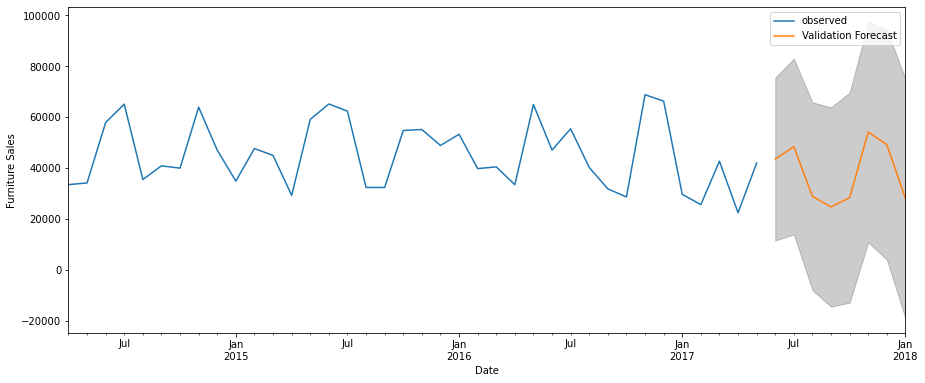

In [141]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
uk_pred = uk_sarima_results.get_forecast(steps=8)
uk_pred_ci2 = uk_pred.conf_int()

plt.figure(figsize=(15,6))
uk_ax = uk_train['2014':].plot(label="observed")
uk_pred.predicted_mean.plot(ax=uk_ax, label="Validation Forecast")

uk_ax.fill_between(uk_pred_ci2.index,
                    uk_pred_ci2.iloc[:, 0],
                    uk_pred_ci2.iloc[:, 1], color='k', alpha=.20)

uk_ax.set_xlabel("Date")
uk_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [142]:
uk_pred.predicted_mean

2017-06-01    43622.294122
2017-07-01    48521.280977
2017-08-01    28984.467513
2017-09-01    24812.598077
2017-10-01    28487.287527
2017-11-01    54211.827690
2017-12-01    49284.427526
2018-01-01    28100.980304
Freq: MS, Name: predicted_mean, dtype: float64

In [143]:
check_rmse(uk_test, uk_pred.predicted_mean)

14004.02


In [144]:
check_mape(uk_test, uk_pred.predicted_mean)

23.16949671669224


In [145]:
check_median_ape(uk_test, uk_pred.predicted_mean)

20.07422586983878


                                      SARIMAX Results                                      
Dep. Variable:                               VALUE   No. Observations:                   38
Model:             SARIMAX(0, 1, 2)x(2, 1, [], 12)   Log Likelihood                -257.611
Date:                             Wed, 23 Mar 2022   AIC                            525.223
Time:                                     21:32:28   BIC                            531.317
Sample:                                 04-01-2014   HQIC                           526.913
                                      - 05-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0006      0.261     -3.829      0.000      -1.513      -0.488
ma.L2          0.2533      

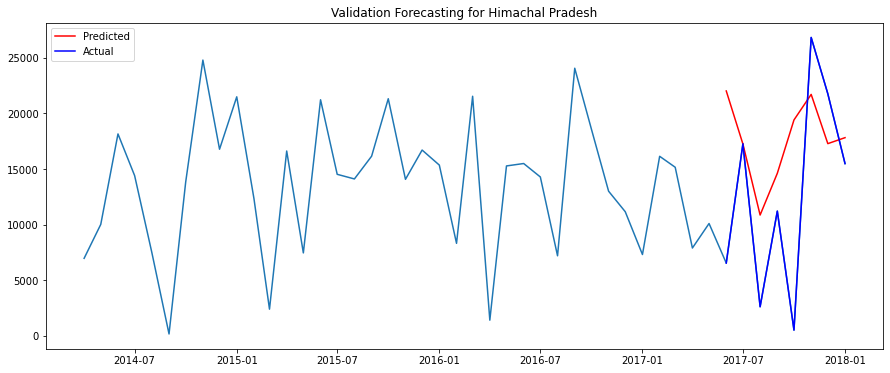

In [146]:
import statsmodels.api as sm

hp_sarima_model = sm.tsa.SARIMAX(hp_train, order = (0,1,2), seasonal_order = (2,1,0,12))
hp_sarima_results = hp_sarima_model.fit()

print(hp_sarima_results.summary())

hp_sar_pred = hp_sarima_results.predict(start = 38, end = 45, dynamic = True)

rcParams['figure.figsize'] = 15,6
plt.plot(hp)
plt.plot(hp_sar_pred, color = "red", label="Predicted")
plt.plot(hp_test, color = "blue", label = "Actual")

plt.title("Validation Forecasting for Himachal Pradesh")
plt.legend()
plt.show()

In [147]:
check_rmse(hp_test, hp_sar_pred)

9542.06


In [148]:
check_mape(hp_test, hp_sar_pred)

540.6589227327107


In [149]:
check_median_ape(hp_test, hp_sar_pred)

25.457976611039374


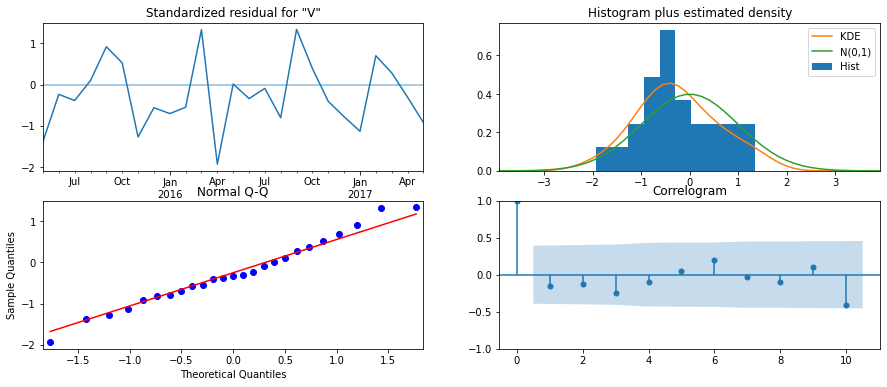

In [150]:
hp_sarima_results.plot_diagnostics(figsize=(15,6))
plt.show()

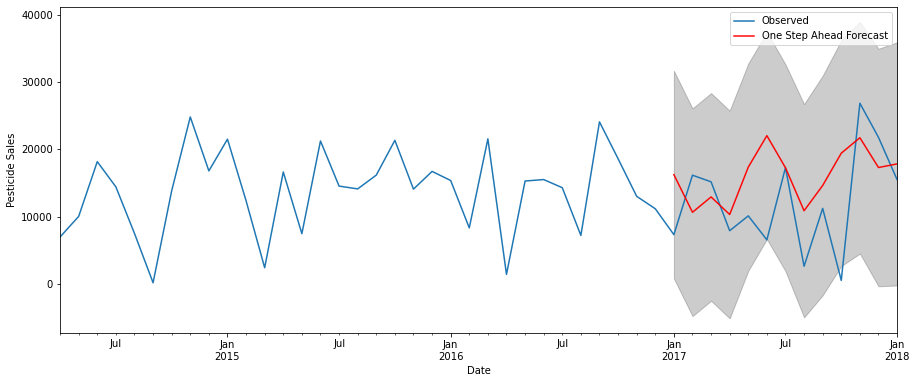

In [151]:
hp_sales_pred = hp_sarima_results.get_prediction(start=pd.to_datetime('2017-01-01'), end = pd.to_datetime('2018-01-01'), dynamic=False)
hp_sales_pred_ci = hp_sales_pred.conf_int()
hp_ax = hp['2014':].plot(label='Observed')
hp_sales_pred.predicted_mean.plot(ax=hp_ax, color="red", label='One Step Ahead Forecast', alpha=10, figsize=(15, 6))
hp_ax.fill_between(hp_sales_pred_ci.index,
                hp_sales_pred_ci.iloc[:, 0],
                hp_sales_pred_ci.iloc[:, 1], color='k', alpha=.20)
hp_ax.set_xlabel('Date')
hp_ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

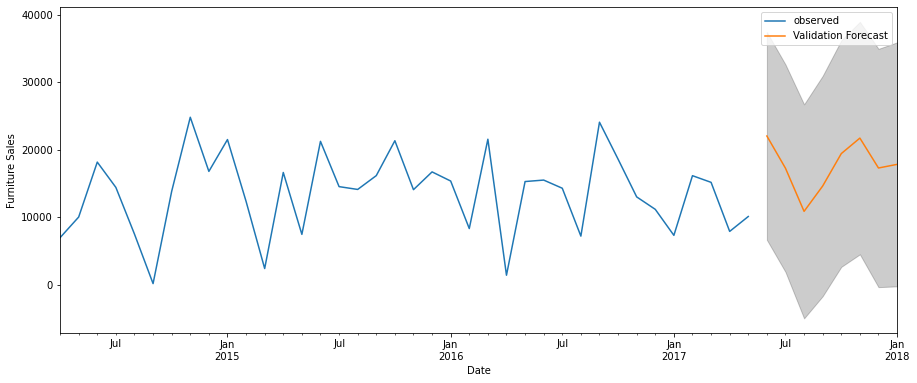

In [152]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
hp_pred = hp_sarima_results.get_forecast(steps=8)
hp_pred_ci2 = hp_pred.conf_int()

plt.figure(figsize=(15,6))
hp_ax = hp_train['2014':].plot(label="observed")
hp_pred.predicted_mean.plot(ax=hp_ax, label="Validation Forecast")

hp_ax.fill_between( hp_pred_ci2.index,
                    hp_pred_ci2.iloc[:, 0],
                    hp_pred_ci2.iloc[:, 1], color='k', alpha=.20)

hp_ax.set_xlabel("Date")
hp_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [153]:
hp_pred.predicted_mean

2017-06-01    22024.080236
2017-07-01    17252.183067
2017-08-01    10864.063095
2017-09-01    14617.846793
2017-10-01    19416.056871
2017-11-01    21714.117274
2017-12-01    17286.309805
2018-01-01    17823.684010
Freq: MS, Name: predicted_mean, dtype: float64

In [154]:
check_rmse(hp_test, hp_pred.predicted_mean)

9542.06


In [155]:
check_mape(hp_test, hp_pred.predicted_mean)

540.6589227327107


In [156]:
check_median_ape(hp_test, hp_pred.predicted_mean)

25.457976611039374


                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                   38
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -328.024
Date:                            Wed, 23 Mar 2022   AIC                            662.049
Time:                                    21:32:29   BIC                            665.705
Sample:                                04-01-2014   HQIC                           663.063
                                     - 05-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7265      0.325     -2.234      0.025      -1.364      -0.089
ma.S.L12      -0.5546      0.475   

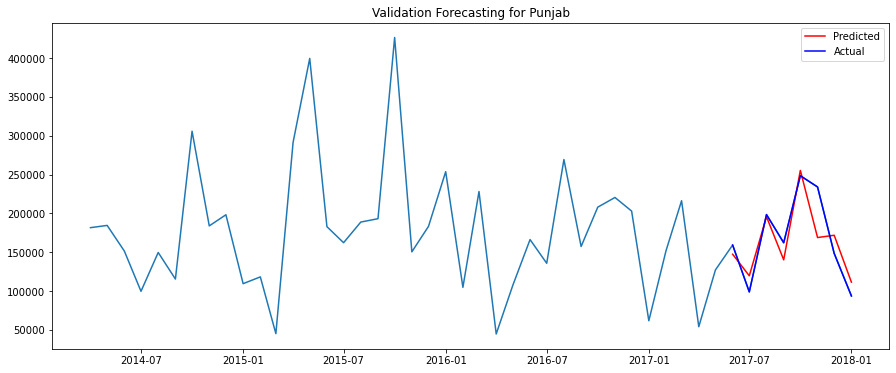

In [157]:
import statsmodels.api as sm

pj_sarima_model = sm.tsa.SARIMAX(pj_train, order = (0,1,1), seasonal_order = (0,1,1,12))
pj_sarima_results = pj_sarima_model.fit()

print(pj_sarima_results.summary())

pj_sar_pred = pj_sarima_results.predict(start = 38, end = 45, dynamic = True)

rcParams['figure.figsize'] = 15,6
plt.plot(pj)
plt.plot(pj_sar_pred, color = "red", label="Predicted")
plt.plot(pj_test, color = "blue", label = "Actual")

plt.title("Validation Forecasting for Punjab")
plt.legend()
plt.show()

In [158]:
check_rmse(pj_test, pj_sar_pred)

27853.39


In [159]:
check_mape(pj_test, pj_sar_pred)

13.575854871573123


In [160]:
check_median_ape(pj_test, pj_sar_pred)

14.648840802487362


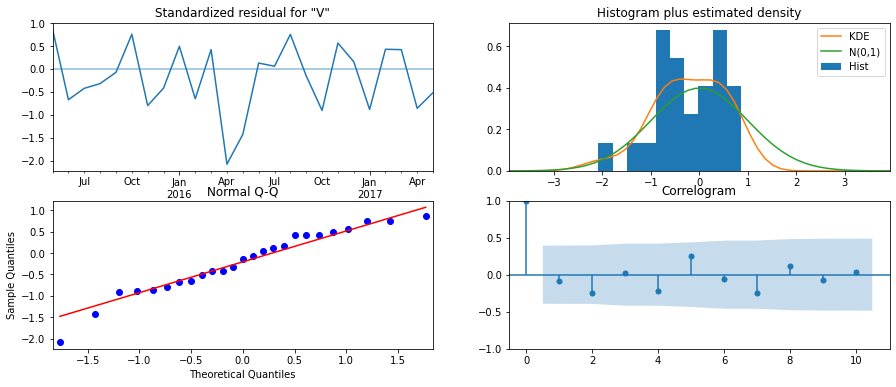

In [161]:
pj_sarima_results.plot_diagnostics(figsize=(15,6))
plt.show()

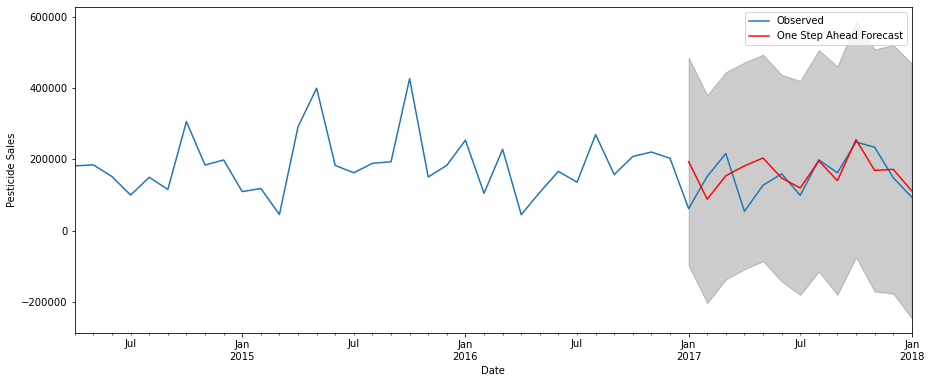

In [162]:
pj_sales_pred = pj_sarima_results.get_prediction(start=pd.to_datetime('2017-01-01'), end = pd.to_datetime('2018-01-01'), dynamic=False)
pj_sales_pred_ci = pj_sales_pred.conf_int()
pj_ax = pj['2014':].plot(label='Observed')
pj_sales_pred.predicted_mean.plot(ax=pj_ax, color="red", label='One Step Ahead Forecast', alpha=10, figsize=(15, 6))
pj_ax.fill_between(pj_sales_pred_ci.index,
                pj_sales_pred_ci.iloc[:, 0],
                pj_sales_pred_ci.iloc[:, 1], color='k', alpha=.20)
pj_ax.set_xlabel('Date')
pj_ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

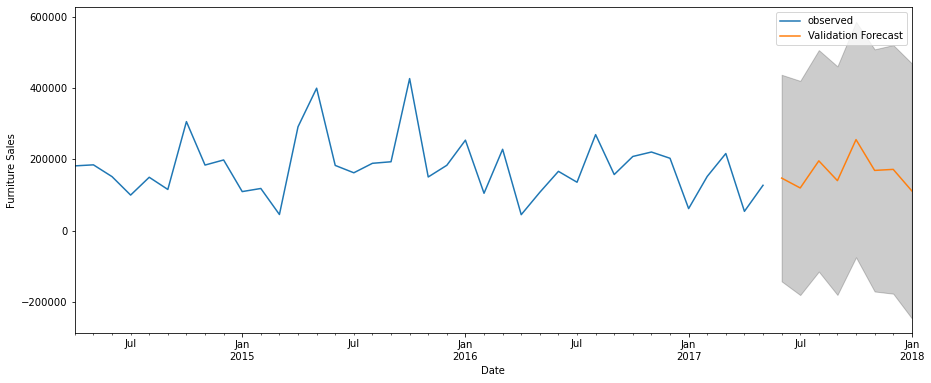

In [163]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
pj_pred = pj_sarima_results.get_forecast(steps=8)
pj_pred_ci2 = pj_pred.conf_int()

plt.figure(figsize=(15,6))
pj_ax = pj_train['2014':].plot(label="observed")
pj_pred.predicted_mean.plot(ax=pj_ax, label="Validation Forecast")

pj_ax.fill_between( pj_pred_ci2.index,
                    pj_pred_ci2.iloc[:, 0],
                    pj_pred_ci2.iloc[:, 1], color='k', alpha=.20)

pj_ax.set_xlabel("Date")
pj_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [164]:
pj_pred.predicted_mean

2017-06-01    147419.260456
2017-07-01    119687.827706
2017-08-01    195733.120571
2017-09-01    140215.630783
2017-10-01    255332.876273
2017-11-01    168916.192029
2017-12-01    171820.100111
2018-01-01    111491.378823
Freq: MS, Name: predicted_mean, dtype: float64

In [165]:
check_rmse(pj_test, pj_pred.predicted_mean)

27853.39


In [166]:
check_mape(pj_test, pj_pred.predicted_mean)

13.575854871573123


In [167]:
check_median_ape(pj_test, pj_pred.predicted_mean)

14.648840802487362


# 24 Month Forecast

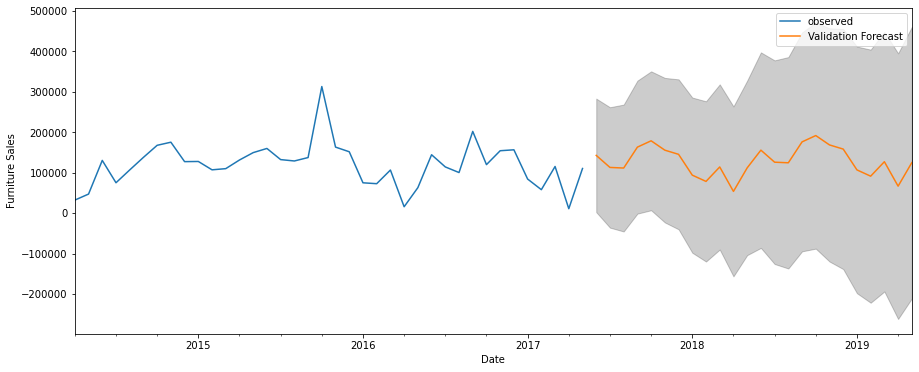

In [168]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
hr_pred = hr_sarima_results.get_forecast(steps=24)
hr_pred_ci2 = hr_pred.conf_int()

plt.figure(figsize=(15,6))
hr_ax = hr_train['2014':].plot(label="observed")
hr_pred.predicted_mean.plot(ax=hr_ax, label="Validation Forecast")

hr_ax.fill_between(hr_pred_ci2.index, hr_pred_ci2.iloc[:, 0], hr_pred_ci2.iloc[:, 1], color='k', alpha=.20)

hr_ax.set_xlabel("Date")
hr_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [169]:
hr_pred.predicted_mean

2017-06-01    143113.289396
2017-07-01    113333.491840
2017-08-01    111847.366180
2017-09-01    163516.518874
2017-10-01    179190.902127
2017-11-01    156029.339499
2017-12-01    145737.531413
2018-01-01     94286.295235
2018-02-01     78767.136205
2018-03-01    114513.806193
2018-04-01     54080.922533
2018-05-01    112231.921567
2018-06-01    156074.313430
2018-07-01    126294.515874
2018-08-01    124808.390215
2018-09-01    176477.542908
2018-10-01    192151.926162
2018-11-01    168990.363534
2018-12-01    158698.555448
2019-01-01    107247.319270
2019-02-01     91728.160240
2019-03-01    127474.830228
2019-04-01     67041.946568
2019-05-01    125192.945601
Freq: MS, Name: predicted_mean, dtype: float64

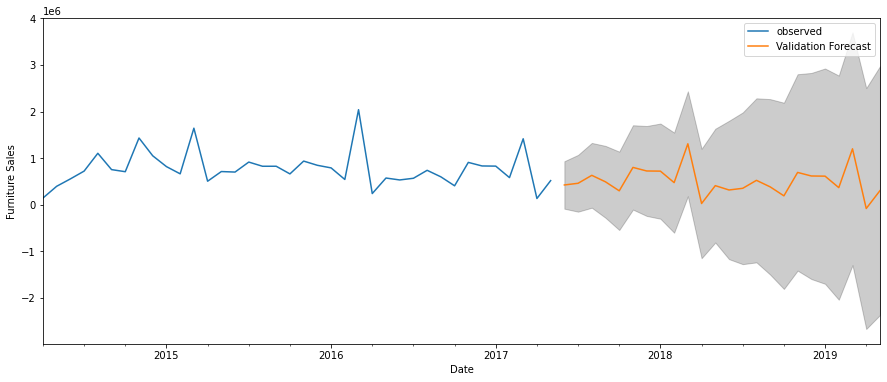

In [170]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
up_pred = up_sarima_results.get_forecast(steps=24)
up_pred_ci2 = up_pred.conf_int()

plt.figure(figsize=(15,6))
up_ax = up_train['2014':].plot(label="observed")
up_pred.predicted_mean.plot(ax=up_ax, label="Validation Forecast")

up_ax.fill_between(up_pred_ci2.index,
                    up_pred_ci2.iloc[:, 0],
                    up_pred_ci2.iloc[:, 1], color='k', alpha=.20)

up_ax.set_xlabel("Date")
up_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [171]:
np.round(up_pred.predicted_mean,3)

2017-06-01     423370.353
2017-07-01     459484.473
2017-08-01     630224.103
2017-09-01     490184.013
2017-10-01     297766.488
2017-11-01     800123.493
2017-12-01     723707.445
2018-01-01     720128.433
2018-02-01     473691.468
2018-03-01    1307121.636
2018-04-01      25266.693
2018-05-01     408885.123
2018-06-01     315739.807
2018-07-01     351853.927
2018-08-01     522593.557
2018-09-01     382553.467
2018-10-01     190135.942
2018-11-01     692492.947
2018-12-01     616076.899
2019-01-01     612497.887
2019-02-01     366060.922
2019-03-01    1199491.090
2019-04-01     -82363.853
2019-05-01     301254.577
Freq: MS, Name: predicted_mean, dtype: float64

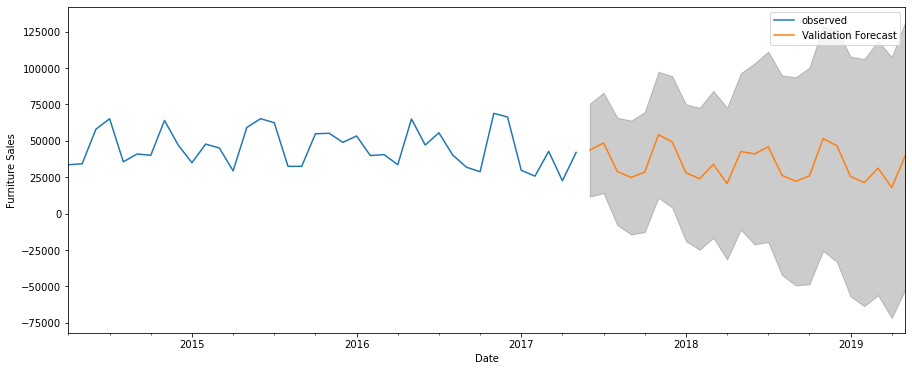

In [172]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
uk_pred = uk_sarima_results.get_forecast(steps=24)
uk_pred_ci2 = uk_pred.conf_int()

plt.figure(figsize=(15,6))
uk_ax = uk_train['2014':].plot(label="observed")
uk_pred.predicted_mean.plot(ax=uk_ax, label="Validation Forecast")

uk_ax.fill_between(uk_pred_ci2.index,
                    uk_pred_ci2.iloc[:, 0],
                    uk_pred_ci2.iloc[:, 1], color='k', alpha=.20)

uk_ax.set_xlabel("Date")
uk_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [173]:
uk_pred.predicted_mean

2017-06-01    43622.294122
2017-07-01    48521.280977
2017-08-01    28984.467513
2017-09-01    24812.598077
2017-10-01    28487.287527
2017-11-01    54211.827690
2017-12-01    49284.427526
2018-01-01    28100.980304
2018-02-01    23904.625800
2018-03-01    33853.880502
2018-04-01    20590.245888
2018-05-01    42666.824920
2018-06-01    40992.669598
2018-07-01    45891.656453
2018-08-01    26354.842990
2018-09-01    22182.973554
2018-10-01    25857.663004
2018-11-01    51582.203166
2018-12-01    46654.803002
2019-01-01    25471.355780
2019-02-01    21275.001277
2019-03-01    31224.255978
2019-04-01    17960.621364
2019-05-01    40037.200397
Freq: MS, Name: predicted_mean, dtype: float64

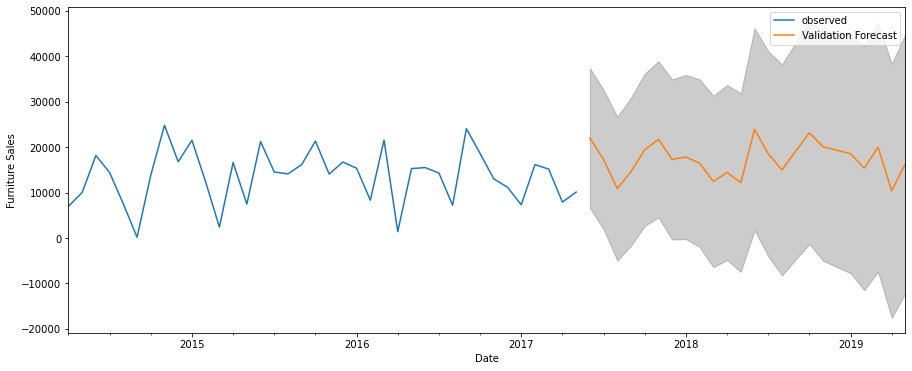

In [174]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
hp_pred = hp_sarima_results.get_forecast(steps=24)
hp_pred_ci2 = hp_pred.conf_int()

plt.figure(figsize=(15,6))
hp_ax = hp_train['2014':].plot(label="observed")
hp_pred.predicted_mean.plot(ax=hp_ax, label="Validation Forecast")

hp_ax.fill_between( hp_pred_ci2.index,
                    hp_pred_ci2.iloc[:, 0],
                    hp_pred_ci2.iloc[:, 1], color='k', alpha=.20)

hp_ax.set_xlabel("Date")
hp_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [175]:
hp_pred.predicted_mean

2017-06-01    22024.080236
2017-07-01    17252.183067
2017-08-01    10864.063095
2017-09-01    14617.846793
2017-10-01    19416.056871
2017-11-01    21714.117274
2017-12-01    17286.309805
2018-01-01    17823.684010
2018-02-01    16460.988872
2018-03-01    12438.082638
2018-04-01    14415.910697
2018-05-01    12179.588633
2018-06-01    23919.689484
2018-07-01    18538.192547
2018-08-01    14984.011508
2018-09-01    19120.737490
2018-10-01    23150.156447
2018-11-01    20085.343153
2018-12-01    19323.229572
2019-01-01    18537.637838
2019-02-01    15362.243010
2019-03-01    19994.025097
2019-04-01    10382.188309
2019-05-01    16375.477783
Freq: MS, Name: predicted_mean, dtype: float64

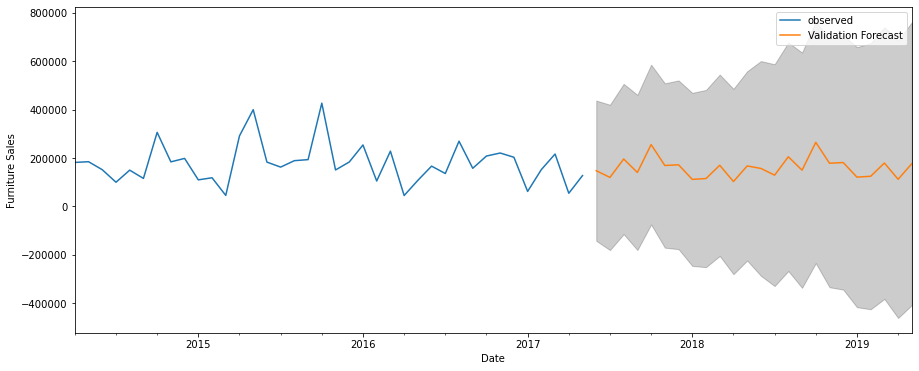

In [176]:
# we use this for forecasting

# pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
pj_pred = pj_sarima_results.get_forecast(steps=24)
pj_pred_ci2 = pj_pred.conf_int()

plt.figure(figsize=(15,6))
pj_ax = pj_train['2014':].plot(label="observed")
pj_pred.predicted_mean.plot(ax=pj_ax, label="Validation Forecast")

pj_ax.fill_between( pj_pred_ci2.index,
                    pj_pred_ci2.iloc[:, 0],
                    pj_pred_ci2.iloc[:, 1], color='k', alpha=.20)

pj_ax.set_xlabel("Date")
pj_ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [177]:
pj_pred.predicted_mean

2017-06-01    147419.260456
2017-07-01    119687.827706
2017-08-01    195733.120571
2017-09-01    140215.630783
2017-10-01    255332.876273
2017-11-01    168916.192029
2017-12-01    171820.100111
2018-01-01    111491.378823
2018-02-01    115031.360163
2018-03-01    169824.600385
2018-04-01    102649.647753
2018-05-01    167147.663901
2018-06-01    156741.417456
2018-07-01    129009.984706
2018-08-01    205055.277571
2018-09-01    149537.787783
2018-10-01    264655.033273
2018-11-01    178238.349029
2018-12-01    181142.257112
2019-01-01    120813.535823
2019-02-01    124353.517163
2019-03-01    179146.757386
2019-04-01    111971.804753
2019-05-01    176469.820902
Freq: MS, Name: predicted_mean, dtype: float64

In [192]:
ABC_24_months_forecast = pd.DataFrame(columns=["Haryana", "Uttar Pradesh", "Uttarakhand", "Himachal Pradesh", "Punjab"])

In [193]:
ABC_24_months_forecast["Haryana"] = np.round(hr_pred.predicted_mean,3)
ABC_24_months_forecast["Uttar Pradesh"] = np.round(up_pred.predicted_mean,3)
ABC_24_months_forecast["Uttarakhand"] = np.round(uk_pred.predicted_mean,3)
ABC_24_months_forecast["Himachal Pradesh"] = np.round(hp_pred.predicted_mean,3)
ABC_24_months_forecast["Punjab"] = np.round(pj_pred.predicted_mean,3)

In [194]:
ABC_24_months_forecast

,Haryana,Uttar Pradesh,Uttarakhand,Himachal Pradesh,Punjab
2017-06-01,143113.289,423370.353,43622.294,22024.080,147419.260
2017-07-01,113333.492,459484.473,48521.281,17252.183,119687.828
2017-08-01,111847.366,630224.103,28984.468,10864.063,195733.121
2017-09-01,163516.519,490184.013,24812.598,14617.847,140215.631
2017-10-01,179190.902,297766.488,28487.288,19416.057,255332.876
2017-11-01,156029.339,800123.493,54211.828,21714.117,168916.192
2017-12-01,145737.531,723707.445,49284.428,17286.310,171820.100
2018-01-01,94286.295,720128.433,28100.980,17823.684,111491.379
2018-02-01,78767.136,473691.468,23904.626,16460.989,115031.360
2018-03-01,114513.806,1307121.636,33853.881,12438.083,169824.600


In [195]:
ABC_24_months_forecast.to_excel("Final Result ABC Company.xlsx", index=True)